# Data Cleaning and Exploratory Data Analysis (EDA)

In this notebook, I perform data cleaning and exploratory data analysis on the Ames Housing Dataset. 

The data cleaning process starts with identifying features with a huge percentage of null values whereby I consider quantitatively (ie. proportion of missing values relative to the dataset) and qualitatively (ie. based on nature of feature and its interaction with other features) whether to drop or impute these values. 

Subsquently, I look at other features which have lower number of missing values. I am unlikely to drop them, but I consider the different methods of imputation to determine the more accurate way to impute. This includes considering the interaction of features with each other and identify the best way to present the data in a way useful for modelling later on. 

**Contents:**
1. [Import, Read and Check Missing Values](#Import-libraries,-read-csv-file-and-check-for-null-values)

2. [Handle Features with Large Number of Missing Values](#Features-with-large-number-of-null-values)

3. [Handle Other Features with Missing Values](#Other-Features-with-Missing-Values)
    
4. [Feature Engineering](#Review-other-Features)

7. [Save out Clean Dataset](#Save-Clean-Dataset)

8. [References](#References)


## Import libraries, read csv file and check for null values

In [1275]:
# import libraries
import pandas as pd
import numpy as np 

# import visualisation libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style("whitegrid")

In [1276]:
#read csv file
train = pd.read_csv("../data/train.csv") 
test = pd.read_csv("../data/test.csv")

In [1277]:
# preview dataset
train.head() # preview train dataset

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [1278]:
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

In [1279]:
#change columns to lowercase and replace spaces with underscore for ease of data manipulation
train.columns = [x.lower().replace(" ", "_") for x in train.columns] 
test.columns = [x.lower().replace(" ", "_") for x in test.columns] 

In [1280]:
train.head() # check that changes are put through

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [1281]:
test.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  alley lot_shape land_contour  ... 3ssn_porch screen_porch pool_area pool_qc  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  fence misc_feature misc_val mo_sold  yr_sold  sale_type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

From the Data Documentation text file, there are outliers which are best removed, specifically houses with living area > 4,000 sq ft (De Cock, 2010). I will remove these from the dataset, before analysing. 

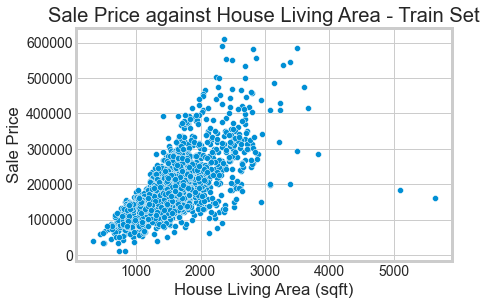

In [1282]:
# plot to view outliers in train set (test set does not have the target variable)
sns.scatterplot(x = 'gr_liv_area', y = 'saleprice', data = train)
plt.title("Sale Price against House Living Area - Train Set")
plt.xlabel("House Living Area (sqft)")
plt.ylabel("Sale Price");

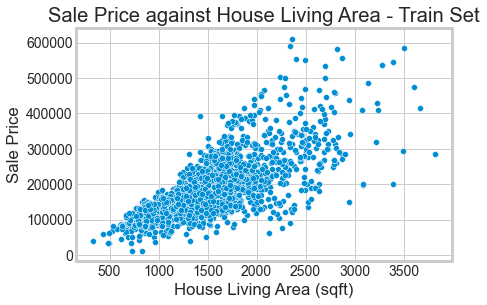

In [1283]:
# remove outliers
train = train[train['gr_liv_area'] < 4000]
# check 
sns.scatterplot(x = 'gr_liv_area', y = 'saleprice', data = train)
plt.title("Sale Price against House Living Area - Train Set")
plt.xlabel("House Living Area (sqft)")
plt.ylabel("Sale Price");

In [1284]:
#look for any null values and view datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2049 non-null   int64  
 1   pid              2049 non-null   int64  
 2   ms_subclass      2049 non-null   int64  
 3   ms_zoning        2049 non-null   object 
 4   lot_frontage     1719 non-null   float64
 5   lot_area         2049 non-null   int64  
 6   street           2049 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2049 non-null   object 
 9   land_contour     2049 non-null   object 
 10  utilities        2049 non-null   object 
 11  lot_config       2049 non-null   object 
 12  land_slope       2049 non-null   object 
 13  neighborhood     2049 non-null   object 
 14  condition_1      2049 non-null   object 
 15  condition_2      2049 non-null   object 
 16  bldg_type        2049 non-null   object 
 17  house_style   

In [1285]:
#look for any null values in the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               879 non-null    int64  
 1   pid              879 non-null    int64  
 2   ms_subclass      879 non-null    int64  
 3   ms_zoning        879 non-null    object 
 4   lot_frontage     719 non-null    float64
 5   lot_area         879 non-null    int64  
 6   street           879 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        879 non-null    object 
 9   land_contour     879 non-null    object 
 10  utilities        879 non-null    object 
 11  lot_config       879 non-null    object 
 12  land_slope       879 non-null    object 
 13  neighborhood     879 non-null    object 
 14  condition_1      879 non-null    object 
 15  condition_2      879 non-null    object 
 16  bldg_type        879 non-null    object 
 17  house_style     

In [1286]:
test[test.columns[test.isna().any()].tolist()].isna().sum()

lot_frontage      160
alley             821
mas_vnr_type        1
mas_vnr_area        1
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
electrical          1
fireplace_qu      422
garage_type        44
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
pool_qc           875
fence             707
misc_feature      838
dtype: int64

The test dataset must have the same number of columns with the train dataset so I will clean it alongside the train dataset. 

## Features with large number of null values

Train dataset has a total of 2051 entries and it is clear that there are missing data for some features. The general rule is to drop the feature when at least 60-70% of data of the feature is missing (Berdikulov, 2019). 

We first zone in on features with less than 1230 (60% of 2051) non-null entries : 
* alley
* fireplace_qu
* pool_qc
* fence
* misc_feature

We consider the nature and its interactions with other similar variables prior to dropping, in the table below : 

| Feature | Brief Description | Understanding Missing Data | Approach to Deal with Missing Data |
| :-----: | :---------------: | :------------------------- | :--------------------- | 
| alley | type of alley access to property which can either be gravel, paved or NA | missing data is likely to mean that there is no alley access. there is too little data on gravel vs paved to make a proper inference, so we will drop this column | 140 rows of data (only 6% of dataset) has this feature, we will drop this column |
| fireplace_qu | fireplace quality, ranked from excellent to poor and NA if no fireplace | looking through the column, the NA values under this column is for when there are no fireplaces | replace NA values with 0 to indicate no fireplaces. to assign a rating to the categories under fireplace and subsume with fireplace column. |
| pool_qc | pool quality | missing data is because majority of the housing data do not have pools. | 9 rows of data of pool quality is too little to make an inference, so we will drop this column. Also, pool area data is only available for the 9 rows of data. We will also drop this column.
| fence | fence quality, categorised into good privacy or minimal and good wood or not, with NA values for no fences | NA values means no fence for the house | 400 rows of data (about 20% of entire dataset) is hard to make an inference from so we will drop this column |
| misc_feature | miscellaneous features not covered by other categories | missing data basically means lack of miscellaneous features| 65 rows of data on miscellaneous features (3% of entire dataset) is not much to make an inference from. we will drop this column. we should also drop misc_val column. |

In [1287]:
#replace NA values under fireplace_qu column with 0
train.fillna({'fireplace_qu': 0}, inplace = True)
test.fillna({'fireplace_qu':0}, inplace = True)
#check
print(train['fireplace_qu'].unique()) 
print(test['fireplace_qu'].unique()) 

#change fireplace categories to ratings
train['fireplace_qu'] = train['fireplace_qu'].map({'Ex':5,'Gd':4,'TA':3 ,'Fa':2,'Po':1, 0:0})
test['fireplace_qu'] = test['fireplace_qu'].map({'Ex':5,'Gd':4,'TA':3 ,'Fa':2,'Po':1, 0:0})
#check
print(train['fireplace_qu'].unique())
print(test['fireplace_qu'].unique()) 

[0 'TA' 'Gd' 'Po' 'Ex' 'Fa']
[0 'Gd' 'Fa' 'TA' 'Po' 'Ex']
[0 3 4 1 5 2]
[0 4 2 3 1 5]


In [1288]:
#reform fireplace features based on fireplace existence and its quality
train['fireplace_rating'] = train['fireplaces']*train['fireplace_qu'] 
test['fireplace_rating'] = test['fireplaces']*test['fireplace_qu']
#check
print(train['fireplace_rating'].unique())
print(test['fireplace_rating'].unique())

[ 0  3  4  6  1  5  8  2 12 10  9]
[ 0  4  8  3  6  2  9  1  5 12 10 15]


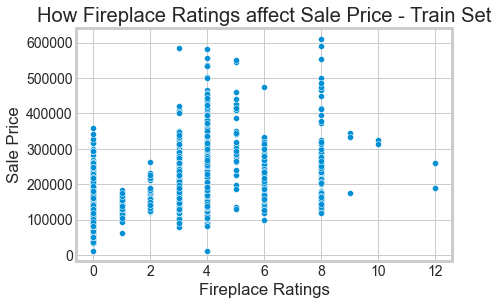

In [1289]:
#view correlation with sales price
sns.scatterplot(x = 'fireplace_rating', y = 'saleprice', data = train)
plt.title("How Fireplace Ratings affect Sale Price - Train Set")
plt.xlabel("Fireplace Ratings")
plt.ylabel("Sale Price");

I would expect that the higher the fireplace rating, the higher price the house would fetch. However, we did not see that from the above plot. In other words, there is no clear relatively linear relationship between fireplace ratings and sales price. Therefore, I will drop this column altogether. 

In [1290]:
#drop original columns per above
train.drop(['fireplace_rating','alley', 'fence', 'fireplaces', 'fireplace_qu', 'pool_qc', 'pool_area', 'misc_feature', 'misc_val'], axis = 1, inplace = True) 
test.drop(['fireplace_rating','alley', 'fence', 'fireplaces', 'fireplace_qu', 'pool_qc', 'pool_area', 'misc_feature', 'misc_val'], axis = 1, inplace = True)
#check
print(train.columns) 
print(test.columns)

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'garage_type', 'garage_yr_blt',
       'garage_finish', 'garage_cars', 'garage_area', '

In [1291]:
#check that both the train and test shape is the same. train set has one more column which is the saleprice.
print(train.shape)
print(test.shape)

(2049, 73)
(879, 72)


## Other Features with Missing Values

From here, there are still missing data in some columns in train dataset, and we will explore them one by one.

Columns with missing data: 
* lot_frontage
* mas_vnr_type
* mas_vnr_area
* bsmt_qual
* bsmt_cond
* bsmt_exposure
* bsmtfin_type_1
* bsmtfin_sf_1
* bsmtfin_type_2
* bsmtfin_sf_2
* bsmt_unf_sf
* total_bsmt_sf
* bsmt_full_bath
* bsmt_half_bath
* garage_type
* garage_yr_blt
* garage_finish
* garage_cars
* garage_area
* garage_qual
* garage_cond

In [1292]:
# number of missing data
train[train.columns[train.isna().any()].tolist()].isna().sum()

lot_frontage      330
mas_vnr_type       22
mas_vnr_area       22
bsmt_qual          55
bsmt_cond          55
bsmt_exposure      58
bsmtfin_type_1     55
bsmtfin_sf_1        1
bsmtfin_type_2     56
bsmtfin_sf_2        1
bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_full_bath      2
bsmt_half_bath      2
garage_type       113
garage_yr_blt     114
garage_finish     114
garage_cars         1
garage_area         1
garage_qual       114
garage_cond       114
dtype: int64

In [1293]:
# missing data in test set
test[test.columns[test.isna().any()].tolist()].isna().sum()

lot_frontage      160
mas_vnr_type        1
mas_vnr_area        1
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
electrical          1
garage_type        44
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
dtype: int64

#### Lot Frontage

Lot frontage is the linear feet of street connected to property (ie. the distance between the front door of the house to the street). Null values amount to about 16% of dataset, which is pretty substantial. 

As it is not reasonable to have zero frontage for houses in Ames, I will impute it and to determine what to impute it with (mean, median or mode etc.), we first look at its distribution. 

<Figure size 1440x720 with 0 Axes>

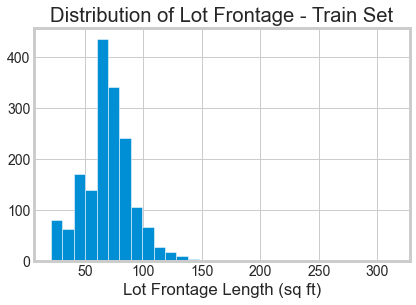

In [1294]:
# plot histogram of lot frontage
plt.figure(figsize = (20,10))
train.hist(column = 'lot_frontage', bins = 30)
plt.title("Distribution of Lot Frontage - Train Set")
plt.xlabel("Lot Frontage Length (sq ft)");

<Figure size 1440x720 with 0 Axes>

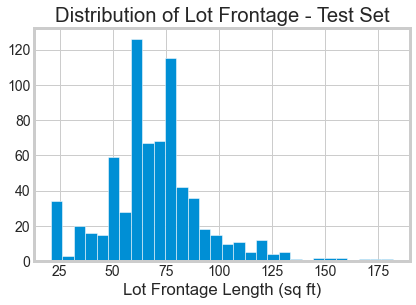

In [1295]:
plt.figure(figsize = (20,10))
test.hist(column = 'lot_frontage', bins = 30)
plt.title("Distribution of Lot Frontage - Test Set")
plt.xlabel("Lot Frontage Length (sq ft)");

Both distributions are positively skewed, indicating that there are outliers at higher values of lot_frontage. As it is not a normal distribution, it's better to impute with the median than the mean (Williams, 2010). 

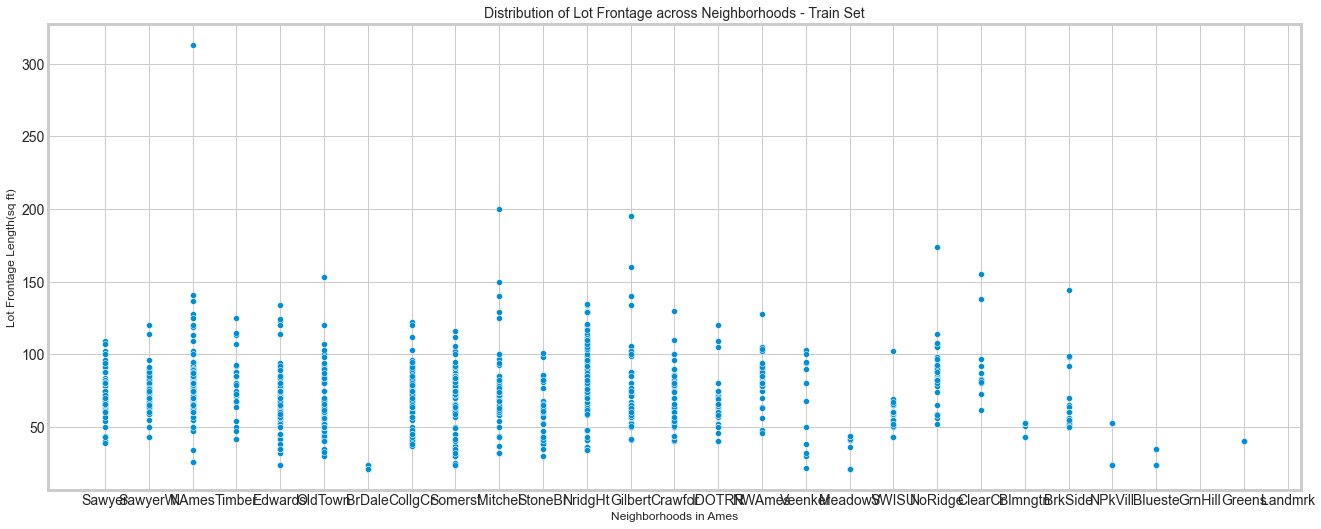

In [1296]:
# consider if values of lot frontage are correlated with neighborhood
plt.figure(figsize = (20,8))
sns.scatterplot(y = 'lot_frontage', x = 'neighborhood', data = train)
plt.title("Distribution of Lot Frontage across Neighborhoods - Train Set", fontsize = 14)
plt.xlabel("Neighborhoods in Ames", fontsize = 12)
plt.ylabel("Lot Frontage Length(sq ft)", fontsize = 12);

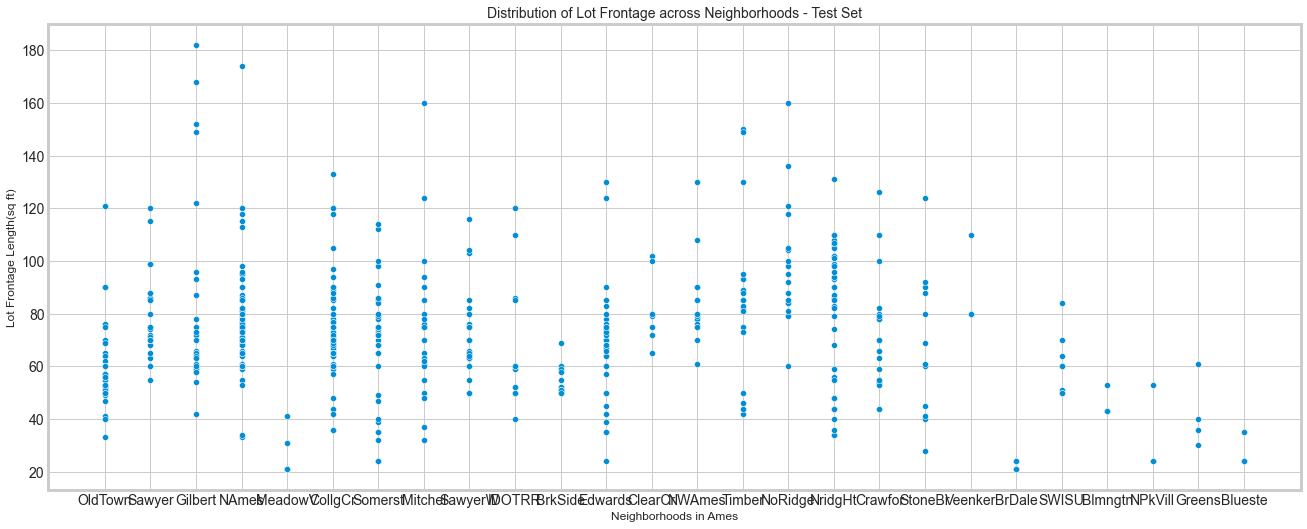

In [1297]:
plt.figure(figsize = (20,8))
sns.scatterplot(y = 'lot_frontage', x = 'neighborhood', data = test)
plt.title("Distribution of Lot Frontage across Neighborhoods - Test Set", fontsize = 14)
plt.xlabel("Neighborhoods in Ames", fontsize = 12)
plt.ylabel("Lot Frontage Length(sq ft)", fontsize = 12);

Generally across all 28 neighbourhoods (except for 6), the median falls between 50-100 sq foot of lot frontage. It is pretty reasonable to impute all null values of lot_frontage with the median. 

In [1298]:
#replace NA values under lot_frontage with its median
train['lot_frontage'].fillna((train['lot_frontage'].median()), inplace = True) 
test['lot_frontage'].fillna((test['lot_frontage'].median()), inplace = True) 
#check
print(train['lot_frontage'].isnull().sum())
print(test['lot_frontage'].isnull().sum())

0
0


Text(0, 0.5, 'Sale Price')

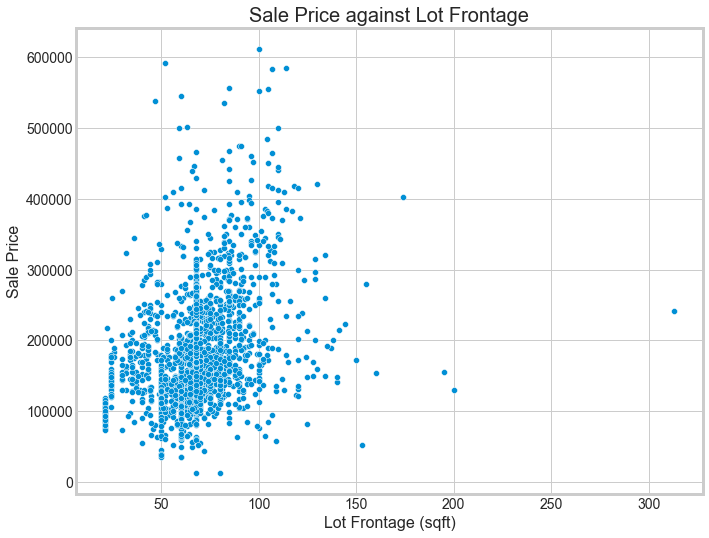

In [1299]:
#view lot frontage correlation with sales price
fig, ax = plt.subplots(figsize = (10,8))
sns.scatterplot(ax = ax, y = 'saleprice',x = 'lot_frontage', data = train)
ax.set_title("Sale Price against Lot Frontage", fontsize = 20)
ax.set_xlabel("Lot Frontage (sqft)", fontsize = 16)
ax.set_ylabel("Sale Price", fontsize = 16)

In [1300]:
#view correlation
train[['lot_frontage','saleprice']].corr()

lot_frontage  saleprice
lot_frontage       1.00000    0.33828
saleprice          0.33828    1.00000

There is no strong correlation between lot frontage and sale price, so I will drop this column. 

In [1301]:
#drop lot frontage column
train.drop(['lot_frontage'], axis = 1, inplace = True) 
test.drop(['lot_frontage'], axis = 1, inplace = True)
#check that it is one column less
print(train.shape)
print(test.shape)

(2049, 72)
(879, 71)


#### Masonry Veneer Type and Area

Masonry veneer type ('mas_vnr_type') is the type of wall structure. The types in the dataset are brick common, brick face, cinder block, stone, or none. Common brick and face bricks have a merely cosmetic difference. Common bricks do not have smooth sides while face bricks do and are made to face externally with a smooth look. Cinder blocks are hollow concrete blocks and is known to provide greater insulation than bricks (Mehta, 2019). We plot a violin plot to view its distribution. 

Masonry veneer area ('mas_vnr_area') is the area of the structure in sq ft.

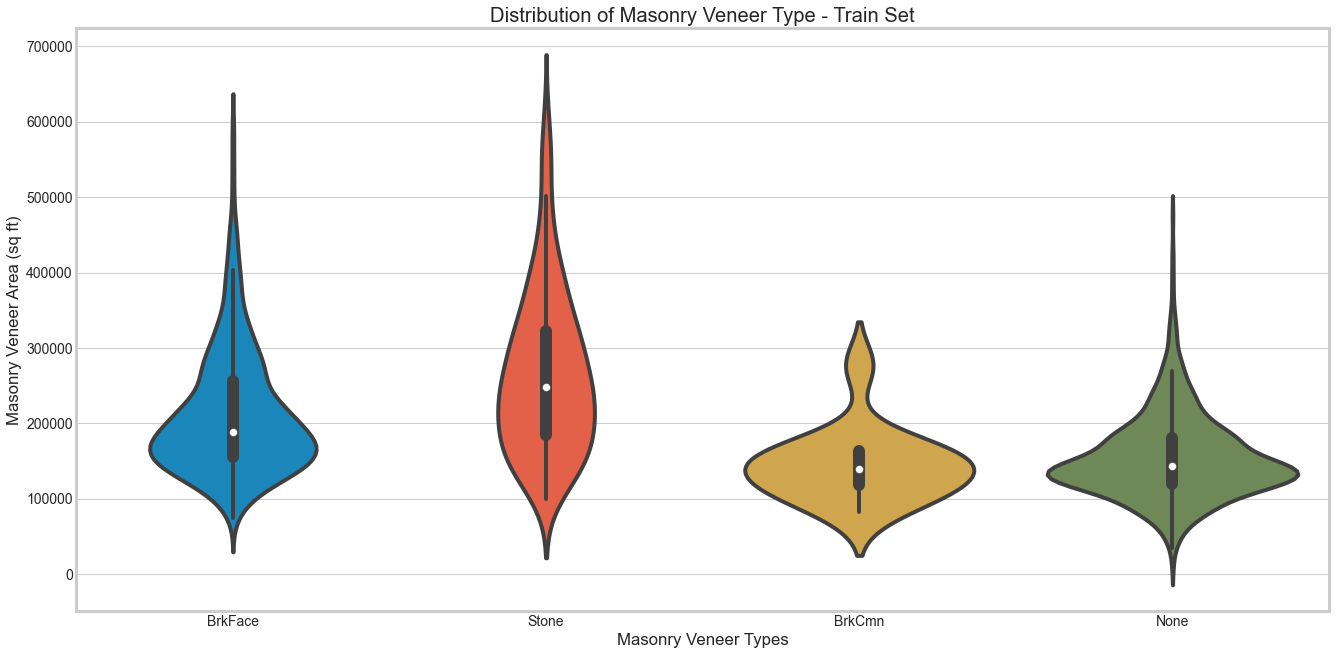

In [1302]:
# plot violinplot of masonry type
plt.figure(figsize = (20,10))
sns.violinplot(y = 'saleprice', x = 'mas_vnr_type', data = train, order = ['BrkFace','Stone','BrkCmn','None'])
plt.title("Distribution of Masonry Veneer Type - Train Set")
plt.xlabel("Masonry Veneer Types")
plt.ylabel("Masonry Veneer Area (sq ft)");

In [1303]:
train['mas_vnr_type'].mode() #view mode

0    None
dtype: object

Generally, brick face veneer type has larger masonry veneer area. We observe this from both datasets. While we expect "None" masonry veneer type to have nil masonry veneer area, there are some outliers which had a value for veneer area. These could probably be data entry errors.

As the mode of masonry veneer type is 'None' and 22 missing entries out of 2051 rows of train data is only about 1% of the dataset, we will impute the missing entries with the mode (ie. None) and masonry veneer area with zero sq ft. 

In [1304]:
# mode of mas_vnr_area
print(train['mas_vnr_area'].mode())
print(test['mas_vnr_area'].mode())

0    0.0
dtype: float64
0    0.0
dtype: float64


In [1305]:
#replace NA values under mas_vnr_type and mas_nvr_area with its mode
train.fillna({'mas_vnr_type': 'None', 
             'mas_vnr_area': 0}, inplace = True)
test.fillna({'mas_vnr_type': 'None', 
             'mas_vnr_area': 0}, inplace = True) 
                               
# if masonry type is None, masonry veneer area should be zero
train.loc[(train['mas_vnr_type'] == "None"), 'mas_vnr_area'] = 0
test.loc[(test['mas_vnr_type'] == "None"), 'mas_vnr_area'] = 0

#check
print(train['mas_vnr_type'].isnull().sum())
print(train['mas_vnr_area'].isnull().sum())
print(test['mas_vnr_type'].isnull().sum())
print(test['mas_vnr_area'].isnull().sum())

0
0
0
0


In [1306]:
#view correlation
train[['mas_vnr_type','mas_vnr_area','saleprice']].corr()

mas_vnr_area  saleprice
mas_vnr_area      1.000000   0.511237
saleprice         0.511237   1.000000

From the above plot for masonry veneer type, there seem to be no clear linear relationship between the masonry veneer type and sales price, so I will drop this column. For masonry veneer area, as there is about 0.5 correlation with sales price, I will keep it. 

In [1307]:
#drop lot frontage column
train.drop(['mas_vnr_type'], axis = 1, inplace = True) 
test.drop(['mas_vnr_type'], axis = 1, inplace = True) 
#check
print(train.shape) 
print(test.shape)

(2049, 71)
(879, 70)


#### Basement Quality, Condition and Exposure

Basement quality is the height of the basement with Excellent rating for basement height of 100+ inches followed by Good, Typical, Fair and Poor, with decrease basement heights. NA values are for those with no basement. Basement condition is the general condition of the basement. Basement exposure refers to whether there is a walkout or garden level basement, which is generally a better option than one with no exposure.

55-58 NA values form about 2-3% of the train dataset which is pretty small. I will impute these with the mode of the respective features, as these are categorical features. 

From a home buyer point of view, I would consider these three factors (ie. quality, condition and exposure) together. I will assign a number rating for the quality, condition and exposure, and subsequently get the average of these factors, taking each factor into equal consideration. 

In [1308]:
# find the mode of each column
print(train['bsmt_qual'].mode())
print(train['bsmt_cond'].mode())
print(train['bsmt_exposure'].mode())
print(test['bsmt_qual'].mode())
print(test['bsmt_cond'].mode())
print(test['bsmt_exposure'].mode())

0    TA
dtype: object
0    TA
dtype: object
0    No
dtype: object
0    TA
dtype: object
0    TA
dtype: object
0    No
dtype: object


In [1309]:
#replace NA values under bsmt_qual and bsmt_cond with its mode
train.fillna({'bsmt_qual': 'TA', 
             'bsmt_cond': 'TA',
             'bsmt_exposure': 'No'}, inplace = True)   
test.fillna({'bsmt_qual': 'TA', 
             'bsmt_cond': 'TA',
             'bsmt_exposure': 'No'}, inplace = True) 
#check
print(train['bsmt_qual'].isnull().sum())
print(train['bsmt_cond'].isnull().sum())
print(train['bsmt_exposure'].isnull().sum())
print(test['bsmt_qual'].isnull().sum())
print(test['bsmt_cond'].isnull().sum())
print(test['bsmt_exposure'].isnull().sum())

0
0
0
0
0
0


In [1310]:
#change to numbered ratings
train['bsmt_qual'] = train['bsmt_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}) 
train['bsmt_cond'] = train['bsmt_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}) 
train['bsmt_exposure'] = train['bsmt_exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1}) 
test['bsmt_qual'] = test['bsmt_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}) 
test['bsmt_cond'] = test['bsmt_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}) 
test['bsmt_exposure'] = test['bsmt_exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1}) 

#check
print(train['bsmt_qual'].unique())
print(train['bsmt_cond'].unique())
print(train['bsmt_exposure'].unique())
print(test['bsmt_qual'].unique())
print(test['bsmt_cond'].unique())
print(test['bsmt_exposure'].unique())

# add average basement condition column
train['bsmt_condition'] = train[['bsmt_qual','bsmt_cond','bsmt_exposure']].sum(axis = 1)/14
test['bsmt_condition'] = test[['bsmt_qual','bsmt_cond','bsmt_exposure']].sum(axis = 1)/14

# check that it is updated
print(train.head())
print(test.head())

[3 4 2 5 1]
[3 4 2 1 5]
[1 4 3 2]
[2 4 3 5 1]
[3 4 2]
[1 3 2 4]
    id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0  109  533352170           60        RL     13517   Pave       IR1   
1  544  531379050           60        RL     11492   Pave       IR1   
2  153  535304180           20        RL      7922   Pave       Reg   
3  318  916386060           60        RL      9802   Pave       Reg   
4  255  906425045           50        RL     14235   Pave       IR1   

  land_contour utilities lot_config  ... wood_deck_sf open_porch_sf  \
0          Lvl    AllPub    CulDSac  ...            0            44   
1          Lvl    AllPub    CulDSac  ...            0            74   
2          Lvl    AllPub     Inside  ...            0            52   
3          Lvl    AllPub     Inside  ...          100             0   
4          Lvl    AllPub     Inside  ...            0            59   

  enclosed_porch 3ssn_porch screen_porch mo_sold  yr_sold  sale_type  \
0         

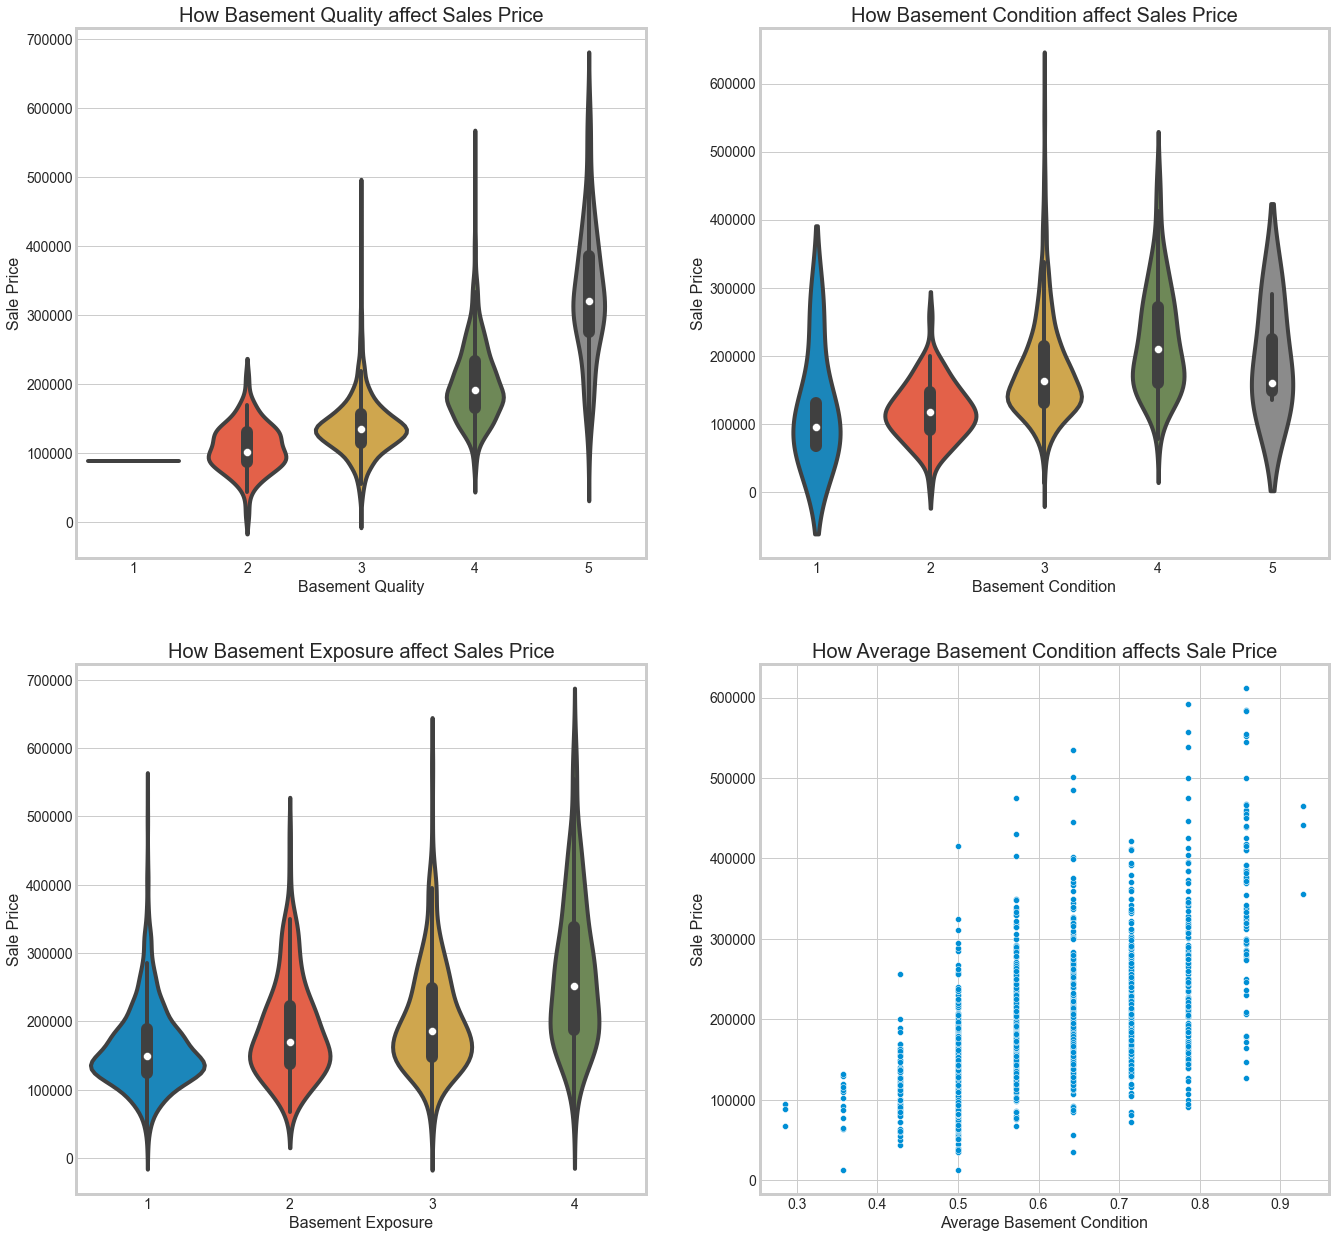

In [1311]:
#view correlation with sale price 
fig, axs = plt.subplots(figsize = (20,20))
ax1 = plt.subplot(221)
sns.violinplot(ax = ax1, y = 'saleprice',x = 'bsmt_qual', data = train)
ax1.set_title("How Basement Quality affect Sales Price", fontsize = 20)
ax1.set_xlabel("Basement Quality", fontsize = 16)
ax1.set_ylabel("Sale Price", fontsize = 16)
ax2 = plt.subplot(222)
sns.violinplot(ax = ax2, y = 'saleprice',x = 'bsmt_cond', data = train)
ax2.set_title("How Basement Condition affect Sales Price", fontsize = 20)
ax2.set_xlabel("Basement Condition", fontsize = 16)
ax2.set_ylabel("Sale Price", fontsize = 16);
ax3 = plt.subplot(223)
sns.violinplot(ax = ax3, y = 'saleprice',x = 'bsmt_exposure', data = train)
ax3.set_title("How Basement Exposure affect Sales Price", fontsize = 20)
ax3.set_xlabel("Basement Exposure", fontsize = 16)
ax3.set_ylabel("Sale Price", fontsize = 16);
ax4 = plt.subplot(224)
sns.scatterplot(ax = ax4, y = 'saleprice',x = 'bsmt_condition', data = train)
ax4.set_title("How Average Basement Condition affects Sale Price", fontsize = 20)
ax4.set_xlabel("Average Basement Condition", fontsize = 16)
ax4.set_ylabel("Sale Price", fontsize = 16);

In [1312]:
#view correlation
train[['bsmt_qual','bsmt_cond','bsmt_exposure','bsmt_condition','saleprice']].corr()

bsmt_qual  bsmt_cond  bsmt_exposure  bsmt_condition  saleprice
bsmt_qual        1.000000   0.211023       0.384754        0.751653   0.683897
bsmt_cond        0.211023   1.000000       0.112873        0.366139   0.174224
bsmt_exposure    0.384754   0.112873       1.000000        0.872111   0.414689
bsmt_condition   0.751653   0.366139       0.872111        1.000000   0.622474
saleprice        0.683897   0.174224       0.414689        0.622474   1.000000

From the correlation data, we see that basement quality has a strongest correlation with sales price compared to basement condition, basement exposure and combined average basement condition (that was engineered). The average basement condition is not as strong because there is very low correlation for basement condition and basement exposure to sales price. I'd drop all others, and keep just the basement quality.

In [1313]:
#drop original bsmt_qual/cond/exposure columns that have been subsumed
train.drop(['bsmt_condition', 'bsmt_cond', 'bsmt_exposure'], axis = 1, inplace = True) 
test.drop(['bsmt_condition', 'bsmt_cond', 'bsmt_exposure'], axis = 1, inplace = True) 
#check
print(train.shape)
print(test.shape)

(2049, 69)
(879, 68)


#### Basement Types and Area 

<u>Basement Type</u>

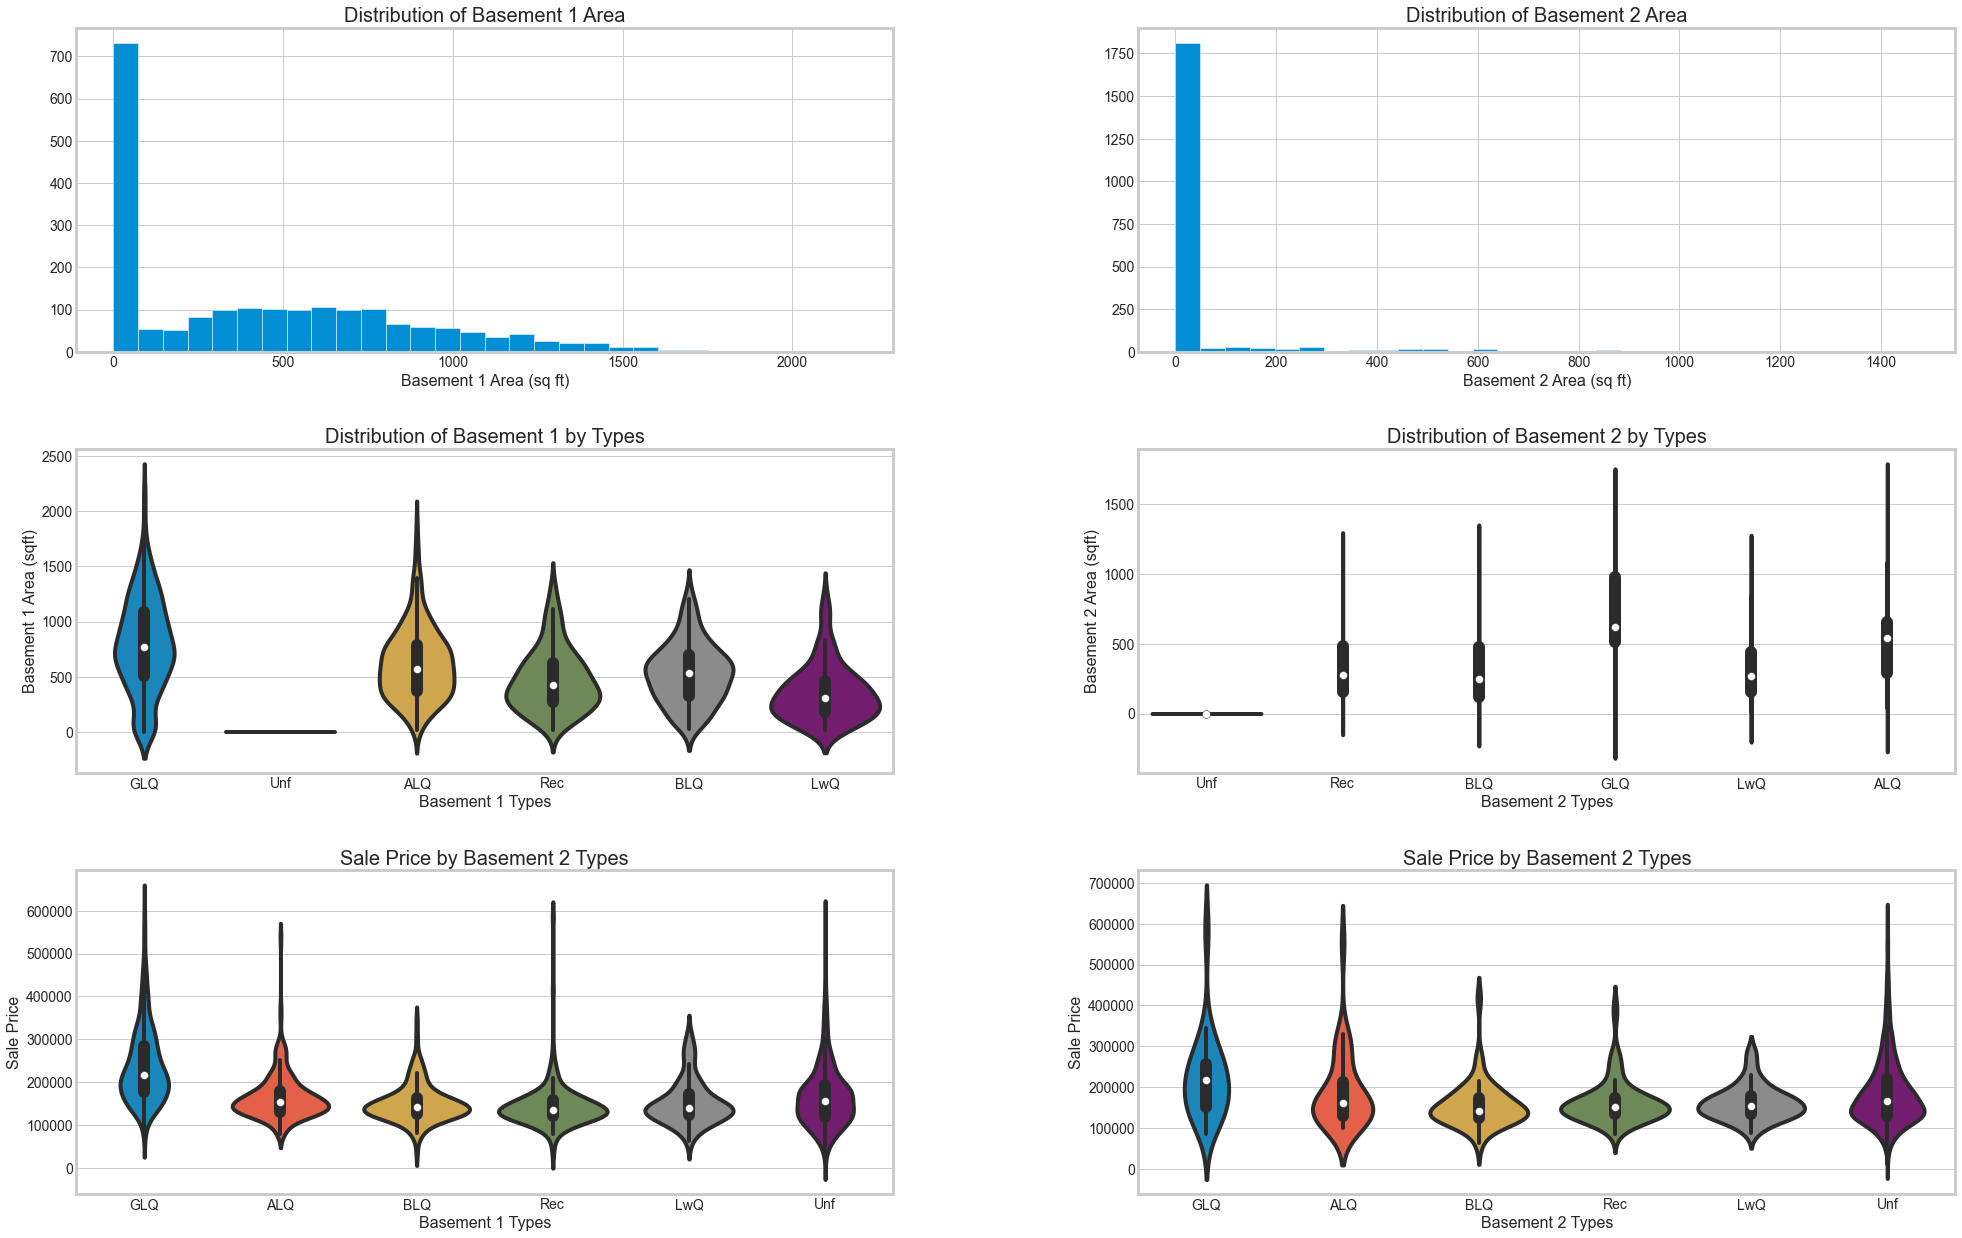

In [1314]:
# view distribution
fig, axes = plt.subplots(3,2,figsize = (30,20))

# plot distribution of basement 1 area
train.hist(ax = axes[0][0], column = 'bsmtfin_sf_1', bins = 30)
axes[0][0].set_title("Distribution of Basement 1 Area", fontsize = 20)
axes[0][0].set_xlabel("Basement 1 Area (sq ft)", fontsize = 16);
# plot distribution of basement 2 area
train.hist(ax = axes[0][1], column = 'bsmtfin_sf_2', bins = 30)
axes[0][1].set_title("Distribution of Basement 2 Area", fontsize = 20)
axes[0][1].set_xlabel("Basement 2 Area (sq ft)", fontsize = 16);
# plot distribution of basement 1 area by types
sns.violinplot(ax = axes[1][0], y = 'bsmtfin_sf_1',x = 'bsmtfin_type_1', data = train)
axes[1][0].set_title("Distribution of Basement 1 by Types", fontsize = 20)
axes[1][0].set_xlabel("Basement 1 Types", fontsize = 16)
axes[1][0].set_ylabel("Basement 1 Area (sqft)", fontsize = 16)
# plot distribution of basement 2 area by types
sns.violinplot(ax = axes[1][1], y = 'bsmtfin_sf_2',x = 'bsmtfin_type_2', data = train)
axes[1][1].set_title("Distribution of Basement 2 by Types", fontsize = 20)
axes[1][1].set_xlabel("Basement 2 Types", fontsize = 16)
axes[1][1].set_ylabel("Basement 2 Area (sqft)", fontsize = 16);
# plot sales prices for basement 1 by types
sns.violinplot(ax = axes[2][0], y = 'saleprice',x = 'bsmtfin_type_1', data = train, order = ['GLQ','ALQ','BLQ','Rec','LwQ','Unf'])
axes[2][0].set_title("Sale Price by Basement 2 Types", fontsize = 20)
axes[2][0].set_xlabel("Basement 1 Types", fontsize = 16)
axes[2][0].set_ylabel("Sale Price", fontsize = 16)
# plot sales prices for basement 2 by types
sns.violinplot(ax = axes[2][1], y = 'saleprice',x = 'bsmtfin_type_2', data = train, order = ['GLQ','ALQ','BLQ','Rec','LwQ','Unf'])
axes[2][1].set_title("Sale Price by Basement 2 Types", fontsize = 20)
axes[2][1].set_xlabel("Basement 2 Types", fontsize = 16)
axes[2][1].set_ylabel("Sale Price", fontsize = 16);

For Basement 1 area, the distribution is heavily right-skewed with a large proportion of basement is unfinished and 0 sq ft recorded. This is the same with Basement 2 area, except that there are significantly lesser houses with 2 basements. 

Generally basement with good living quarters have larger area and higher sale prices. The median sale price for good living quarters is higher than other types for both basement. Other ratings apart from that generally covers the same area and price range.

I will assign a rating for the quality of the living quarters for both basement 1 and 2 to take that into consideration. 

In [1315]:
# find the mode
print(train['bsmtfin_type_1'].mode())
print(train['bsmtfin_type_2'].mode())
print(test['bsmtfin_type_1'].mode())
print(test['bsmtfin_type_2'].mode())

0    GLQ
dtype: object
0    Unf
dtype: object
0    Unf
dtype: object
0    Unf
dtype: object


In [1316]:
#replace NA values under bsmtfin_type_1 and bsmtfin_type_2 with its mode
train.fillna({'bsmtfin_type_1': 'GLQ', 
             'bsmtfin_type_2': 'Unf'}, inplace = True)  
test.fillna({'bsmtfin_type_1': 'Unf', 
             'bsmtfin_type_2': 'Unf'}, inplace = True)  
#check
print(train['bsmtfin_type_1'].isnull().sum())
print(train['bsmtfin_type_2'].isnull().sum())
print(test['bsmtfin_type_1'].isnull().sum())
print(test['bsmtfin_type_2'].isnull().sum())

0
0
0
0


In [1317]:
#change to numbered ratings
train['bsmtfin_type_1'] = train['bsmtfin_type_1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1}) 
train['bsmtfin_type_2'] = train['bsmtfin_type_2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1}) 
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1}) 
test['bsmtfin_type_2'] = test['bsmtfin_type_2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1}) 

In [1318]:
# add average basement quality
train['bsmt_quality'] = train[['bsmtfin_type_1','bsmtfin_type_2']].sum(axis = 1)/12
test['bsmt_quality'] = test[['bsmtfin_type_1','bsmtfin_type_2']].sum(axis = 1)/12
# check that it is updated
print(train.head())
print(test.head())

    id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0  109  533352170           60        RL     13517   Pave       IR1   
1  544  531379050           60        RL     11492   Pave       IR1   
2  153  535304180           20        RL      7922   Pave       Reg   
3  318  916386060           60        RL      9802   Pave       Reg   
4  255  906425045           50        RL     14235   Pave       IR1   

  land_contour utilities lot_config  ... wood_deck_sf open_porch_sf  \
0          Lvl    AllPub    CulDSac  ...            0            44   
1          Lvl    AllPub    CulDSac  ...            0            74   
2          Lvl    AllPub     Inside  ...            0            52   
3          Lvl    AllPub     Inside  ...          100             0   
4          Lvl    AllPub     Inside  ...            0            59   

  enclosed_porch 3ssn_porch screen_porch mo_sold  yr_sold  sale_type  \
0              0          0            0       3     2010        WD    
1 

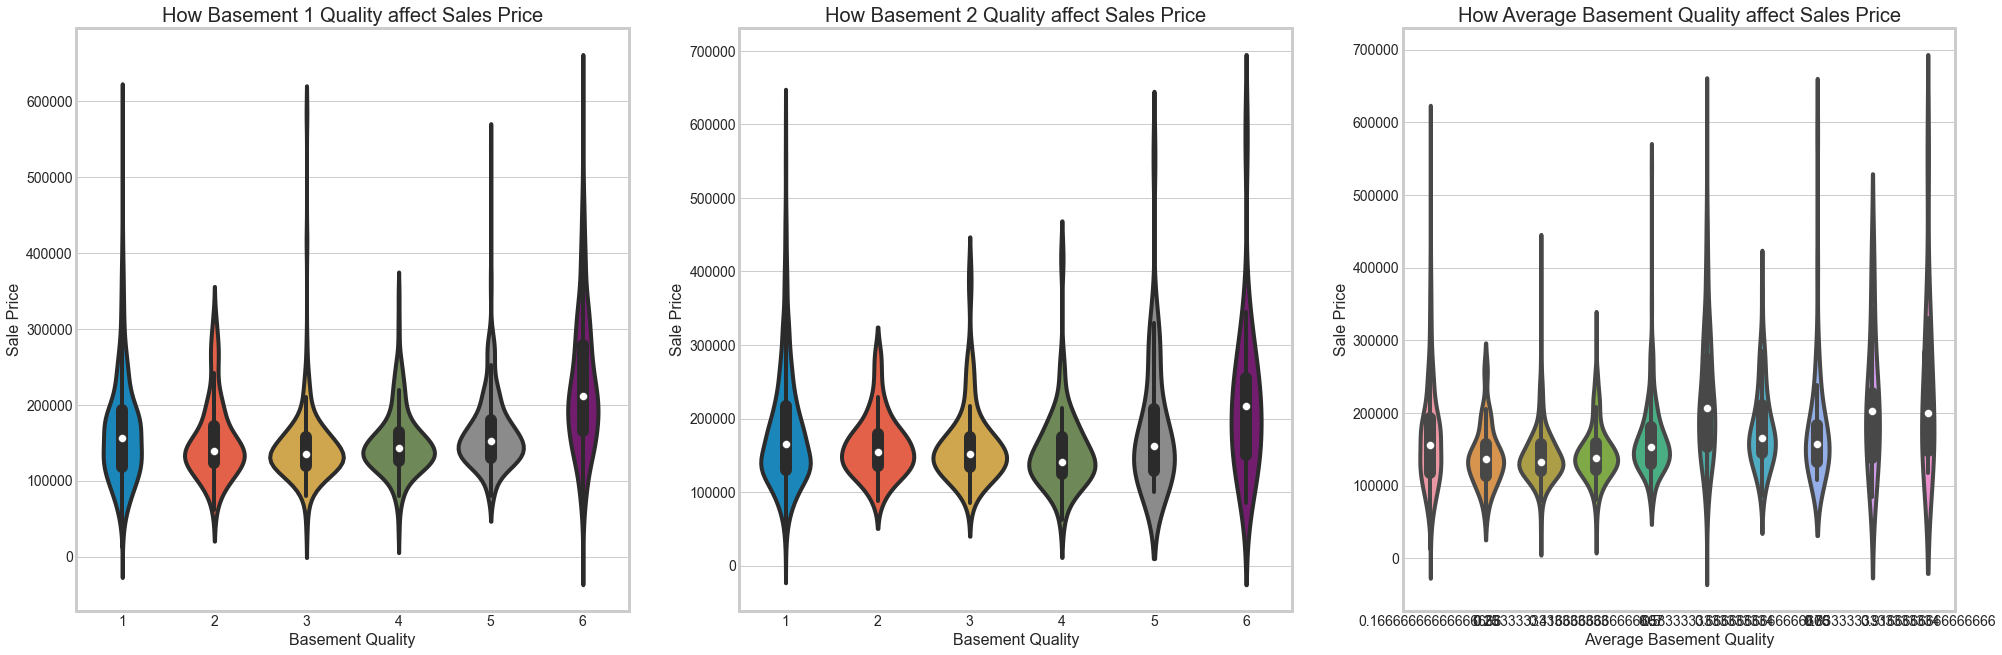

In [1319]:
#view correlation with sale price 
fig, axs = plt.subplots(figsize = (30,10))
ax1 = plt.subplot(131)
sns.violinplot(ax = ax1, y = 'saleprice',x = 'bsmtfin_type_1', data = train)
ax1.set_title("How Basement 1 Quality affect Sales Price", fontsize = 20)
ax1.set_xlabel("Basement Quality", fontsize = 16)
ax1.set_ylabel("Sale Price", fontsize = 16)
ax2 = plt.subplot(132)
sns.violinplot(ax = ax2, y = 'saleprice',x = 'bsmtfin_type_2', data = train)
ax2.set_title("How Basement 2 Quality affect Sales Price", fontsize = 20)
ax2.set_xlabel("Basement Quality", fontsize = 16)
ax2.set_ylabel("Sale Price", fontsize = 16);
ax3 = plt.subplot(133)
sns.violinplot(ax = ax3, y = 'saleprice',x = 'bsmt_quality', data = train)
ax3.set_title("How Average Basement Quality affect Sales Price", fontsize = 20)
ax3.set_xlabel("Average Basement Quality", fontsize = 16)
ax3.set_ylabel("Sale Price", fontsize = 16);

In [1320]:
#view correlation
train[['bsmtfin_type_1','bsmtfin_type_2','bsmt_quality','saleprice']].corr()

bsmtfin_type_1  bsmtfin_type_2  bsmt_quality  saleprice
bsmtfin_type_1        1.000000        0.041684      0.915985   0.285509
bsmtfin_type_2        0.041684        1.000000      0.439045  -0.012384
bsmt_quality          0.915985        0.439045      1.000000   0.251770
saleprice             0.285509       -0.012384      0.251770   1.000000

The above features appear to have very little correlation to sales price, so I will drop all. 

In [1321]:
#drop original bsmt_qual/cond/exposure columns that have been subsumed
train.drop(['bsmtfin_type_1', 'bsmtfin_type_2','bsmt_quality'], axis = 1, inplace = True) 
test.drop(['bsmtfin_type_1', 'bsmtfin_type_2','bsmt_quality'], axis = 1, inplace = True) 
#check
print(train.shape)
print(test.shape)

(2049, 67)
(879, 66)


<u>Basement Area</u>

In [1322]:
#replace NA values under bsmtfin_sf_1, bsmtfin_sf_2 and total_bsmt_sf with zero, because it belongs to data with no basement
train.fillna({'bsmtfin_sf_1': 0, 
             'bsmtfin_sf_2': 0,
             'total_bsmt_sf': 0}, inplace = True)   
test.fillna({'bsmtfin_sf_1': 0, 
             'bsmtfin_sf_2': 0,
             'total_bsmt_sf': 0}, inplace = True) 
#check
print(train['bsmtfin_sf_1'].isnull().sum())
print(train['bsmtfin_sf_2'].isnull().sum())
print(train['total_bsmt_sf'].isnull().sum())
print(test['bsmtfin_sf_1'].isnull().sum())
print(test['bsmtfin_sf_2'].isnull().sum())
print(test['total_bsmt_sf'].isnull().sum())

0
0
0
0
0
0


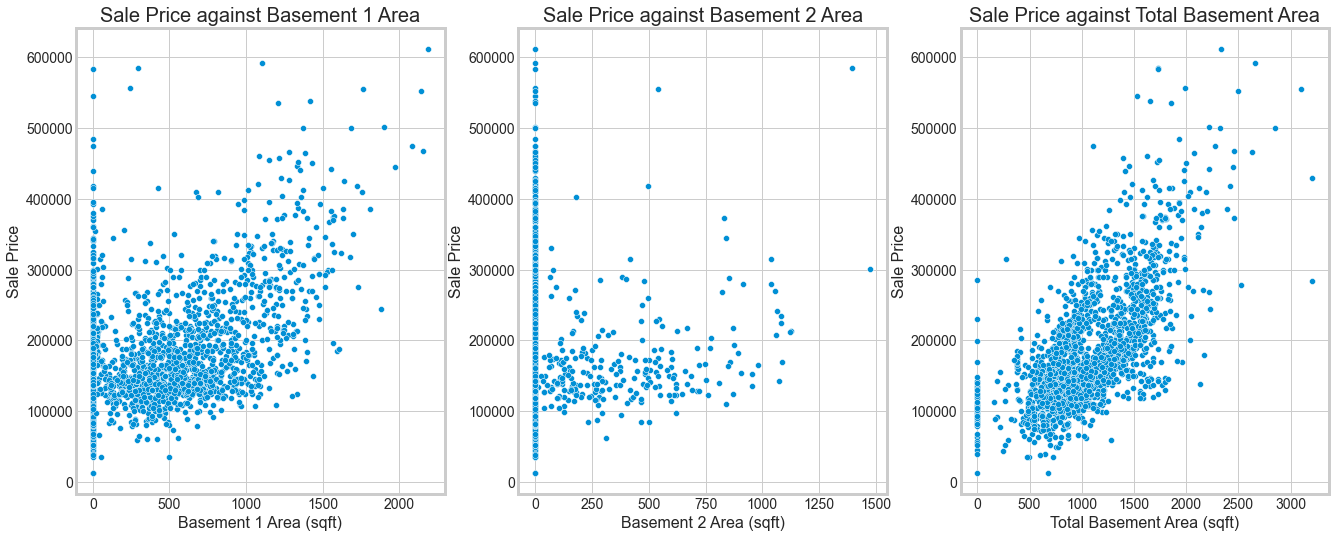

In [1323]:
# explore whether respective basement area affects sale price in a similar manner as per total basement area
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (20,8))

sns.scatterplot(ax = ax1, y = 'saleprice',x = 'bsmtfin_sf_1', data = train)
ax1.set_title("Sale Price against Basement 1 Area", fontsize = 20)
ax1.set_xlabel("Basement 1 Area (sqft)", fontsize = 16)
ax1.set_ylabel("Sale Price", fontsize = 16)

sns.scatterplot(ax = ax2, y = 'saleprice',x = 'bsmtfin_sf_2', data = train)
ax2.set_title("Sale Price against Basement 2 Area", fontsize = 20)
ax2.set_xlabel("Basement 2 Area (sqft)", fontsize = 16)
ax2.set_ylabel("Sale Price", fontsize = 16);

sns.scatterplot(ax = ax3, y = 'saleprice',x = 'total_bsmt_sf', data = train)
ax3.set_title("Sale Price against Total Basement Area", fontsize = 20)
ax3.set_xlabel("Total Basement Area (sqft)", fontsize = 16)
ax3.set_ylabel("Sale Price", fontsize = 16);

From the scatterplot, there is relatively linear relationship between sales price and basement 1 and total basement area, whereas the relationship between sales price and basement 2 is inconclusive. Total basement area has the strongest linear relationship with sales price so I will drop the area of the respective basement. 

In [1324]:
# drop original bsmt 1 area, bsmt 2 area and unfinished bsmt area columns that have been subsumed
train.drop(['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf'], axis = 1, inplace = True) 
test.drop(['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf'], axis = 1, inplace = True) 
#check
print(train.shape)
print(test.shape)

(2049, 64)
(879, 63)


<u>Basement Bathrooms</u>

There is a full bathroom and half bathroom variable for basement. Half bathroom excludes the shower and tub. As there are only 2 missing data, I will impute with mode. 

In [1325]:
# find the mode
print(train['bsmt_full_bath'].mode())
print(train['bsmt_half_bath'].mode())
print(test['bsmt_full_bath'].mode())
print(test['bsmt_half_bath'].mode())

0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64


In [1326]:
#replace NA values under bsmtfin_type_1 and bsmtfin_type_2 with its mode
train.fillna({'bsmt_full_bath': 0, 
             'bsmt_half_bath': 0}, inplace = True)  
test.fillna({'bsmt_full_bath': 0, 
             'bsmt_half_bath': 0}, inplace = True)   
#check
print(train['bsmt_full_bath'].isnull().sum())
print(train['bsmt_half_bath'].isnull().sum())
print(test['bsmt_full_bath'].isnull().sum())
print(test['bsmt_half_bath'].isnull().sum())

0
0
0
0


#### Garage Type, Year Built, Finish, Cars, Area

It seems that ~ 113-114 missing values of garage are relatively consistent across all garage attributes. There is a chance that missing values are because there is no garage for the respective houses. 

From the description of data for garage_finish, NA means there is no garage for the particular house. This means that the entry would also have null values for other garage attributes. 

In [1327]:
# check summary for null values on train dataset
train[train.columns[train.isna().any()].tolist()].isna().sum()

garage_type      113
garage_yr_blt    114
garage_finish    114
garage_cars        1
garage_area        1
garage_qual      114
garage_cond      114
dtype: int64

In [1328]:
# check summary of null values for test dataset and note that test data has one null value under electrical column, to be cleaned.
test[test.columns[test.isna().any()].tolist()].isna().sum()

electrical        1
garage_type      44
garage_yr_blt    45
garage_finish    45
garage_qual      45
garage_cond      45
dtype: int64

Looking at the data in details, there is a data entry error under garage_type which had a value when there are null values for other garage attributes (ie. the house should does not have a garage but a data was accidentally keyed in. I will remove this erroneous data. 

In [1329]:
train.head()

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0  109  533352170           60        RL     13517   Pave       IR1   
1  544  531379050           60        RL     11492   Pave       IR1   
2  153  535304180           20        RL      7922   Pave       Reg   
3  318  916386060           60        RL      9802   Pave       Reg   
4  255  906425045           50        RL     14235   Pave       IR1   

  land_contour utilities lot_config  ... paved_drive wood_deck_sf  \
0          Lvl    AllPub    CulDSac  ...           Y            0   
1          Lvl    AllPub    CulDSac  ...           Y            0   
2          Lvl    AllPub     Inside  ...           Y            0   
3          Lvl    AllPub     Inside  ...           Y          100   
4          Lvl    AllPub     Inside  ...           N            0   

  open_porch_sf enclosed_porch 3ssn_porch screen_porch  mo_sold  yr_sold  \
0            44              0          0            0        3     2010   
1            74              0          0            0        4     2009   
2            52              0          0            0        1     2010   
3             0              0          0            0        4     2010   
4            59              0          0            0        3     2010   

   sale_type  saleprice  
0        WD      130500  
1        WD      220000  
2        WD      109000  
3        WD      174000  
4        WD      138500  

[5 rows x 64 columns]

In [1330]:
#remove error data entry
train.at[1712,'garage_type'] = np.nan

In [1331]:
#remove error data entry
test.at[767,'garage_type'] = np.nan

In [1332]:
train[train.columns[train.isna().any()].tolist()].isna().sum()

garage_type      114
garage_yr_blt    114
garage_finish    114
garage_cars        1
garage_area        1
garage_qual      114
garage_cond      114
dtype: int64

In [1333]:
test[test.columns[test.isna().any()].tolist()].isna().sum()

electrical        1
garage_type      45
garage_yr_blt    45
garage_finish    45
garage_qual      45
garage_cond      45
dtype: int64

114 entries is about 5% of the original dataset and is unlikely to have a huge impact on regression. I shall impute each of these fields accordingly per table below :

| Feature | Brief Description | Considerations and Approach to Deal with Missing Data |
| :-: | :- | :- |
| garage_type | garage location - 2Types, attached to home, basement garage, builtin, car port, detached or NA (no garage) | As these are categorical variables, it would make more sense to indicate 'None' for those without, rather than an NA. To replace NA with 'None'. This would be more accurate than to impute with mode, for instance. |
| garage_yr_blt | year garage was built | From review of dataset, the year garage was built is most often the same as the year the house was built. It would affect the data if these NA values are imputed with 0 or 'None'. If impute with mode, it may not make sense relative to year house was built/remodelled. It is reasonable to assume that year garage was built would be close to the year house was built so we can remove this. |
| garage_finish | interior finish of the garage - finished, rough finished, unfinished or NA (no garage) | This is also a categorical variable. To replace NA with 'None'.
| garage_cars | the number of cars that can fit in the garage | the 1 null value could be due to data entry error, whereby it should instead be 0. For NA values here, to impute with zero, as no garage means no car capacity within the house compound. 
| garage_area | size of garage in sq ft | similar to above, to replace NA value with 0 to indicate no garage. 
| garage_qual | garage quality - excellent, good, average, fair, poor or NA (no garage) | To assign number ratings for each level and put a 0 for no garage. To combine with garage_cond as from a home buyer's perspective, both these factors will be considered together. |
| garage_cond | garage condition with same ratings as garage quality | To assign number ratings for each level and put a 0 for no garage. To combine with garage_qual, as abovementioned |

In [1334]:
#replace NA values accordingly per above
train.fillna({'garage_type': 'None', 
             'garage_finish': 'None',
             'garage_cars': 0,
             'garage_area': 0,
             'garage_qual': 0,
             'garage_cond': 0}, inplace = True)       
test.fillna({'garage_type': 'None', 
             'garage_finish': 'None',
             'garage_cars': 0,
             'garage_area': 0,
             'garage_qual': 0,
             'garage_cond': 0}, inplace = True)      

#check
print(train[train.columns[train.isna().any()].tolist()].isna().sum())
print(test[test.columns[test.isna().any()].tolist()].isna().sum())

garage_yr_blt    114
dtype: int64
electrical        1
garage_yr_blt    45
dtype: int64


In [1335]:
# assign number ratings to garage quality and condition
train['garage_qual'] = train['garage_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['garage_cond'] = train['garage_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
test['garage_qual'] = test['garage_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
test['garage_cond'] = test['garage_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
# get the mean of both
train['avg_garage_cond'] = train[['garage_qual', 'garage_cond']].mean(axis = 1) 
test['avg_garage_cond'] = test[['garage_qual', 'garage_cond']].mean(axis = 1) 
# check that it is updated
print(train.shape)
print(test.shape)

(2049, 65)
(879, 64)


In [1336]:
# drop features
train.drop(['garage_qual', 'garage_cond', 'garage_yr_blt'], axis = 1, inplace = True) 
test.drop(['garage_qual', 'garage_cond', 'garage_yr_blt'], axis = 1, inplace = True) 
#check
print(train.shape)
print(test.shape)

(2049, 62)
(879, 61)


In [1337]:
train.fillna({'avg_garage_cond': 0}, inplace = True)   
test.fillna({'avg_garage_cond': 0}, inplace = True)    

In [1338]:
# check that null values have been replaced in train dataset
train[train.columns[train.isna().any()].tolist()].isna().sum()

Series([], dtype: float64)

In [1339]:
#check that null values have been replaced in the test dataset. to note to handle electrical null value.
test[test.columns[test.isna().any()].tolist()].isna().sum()

electrical    1
dtype: int64

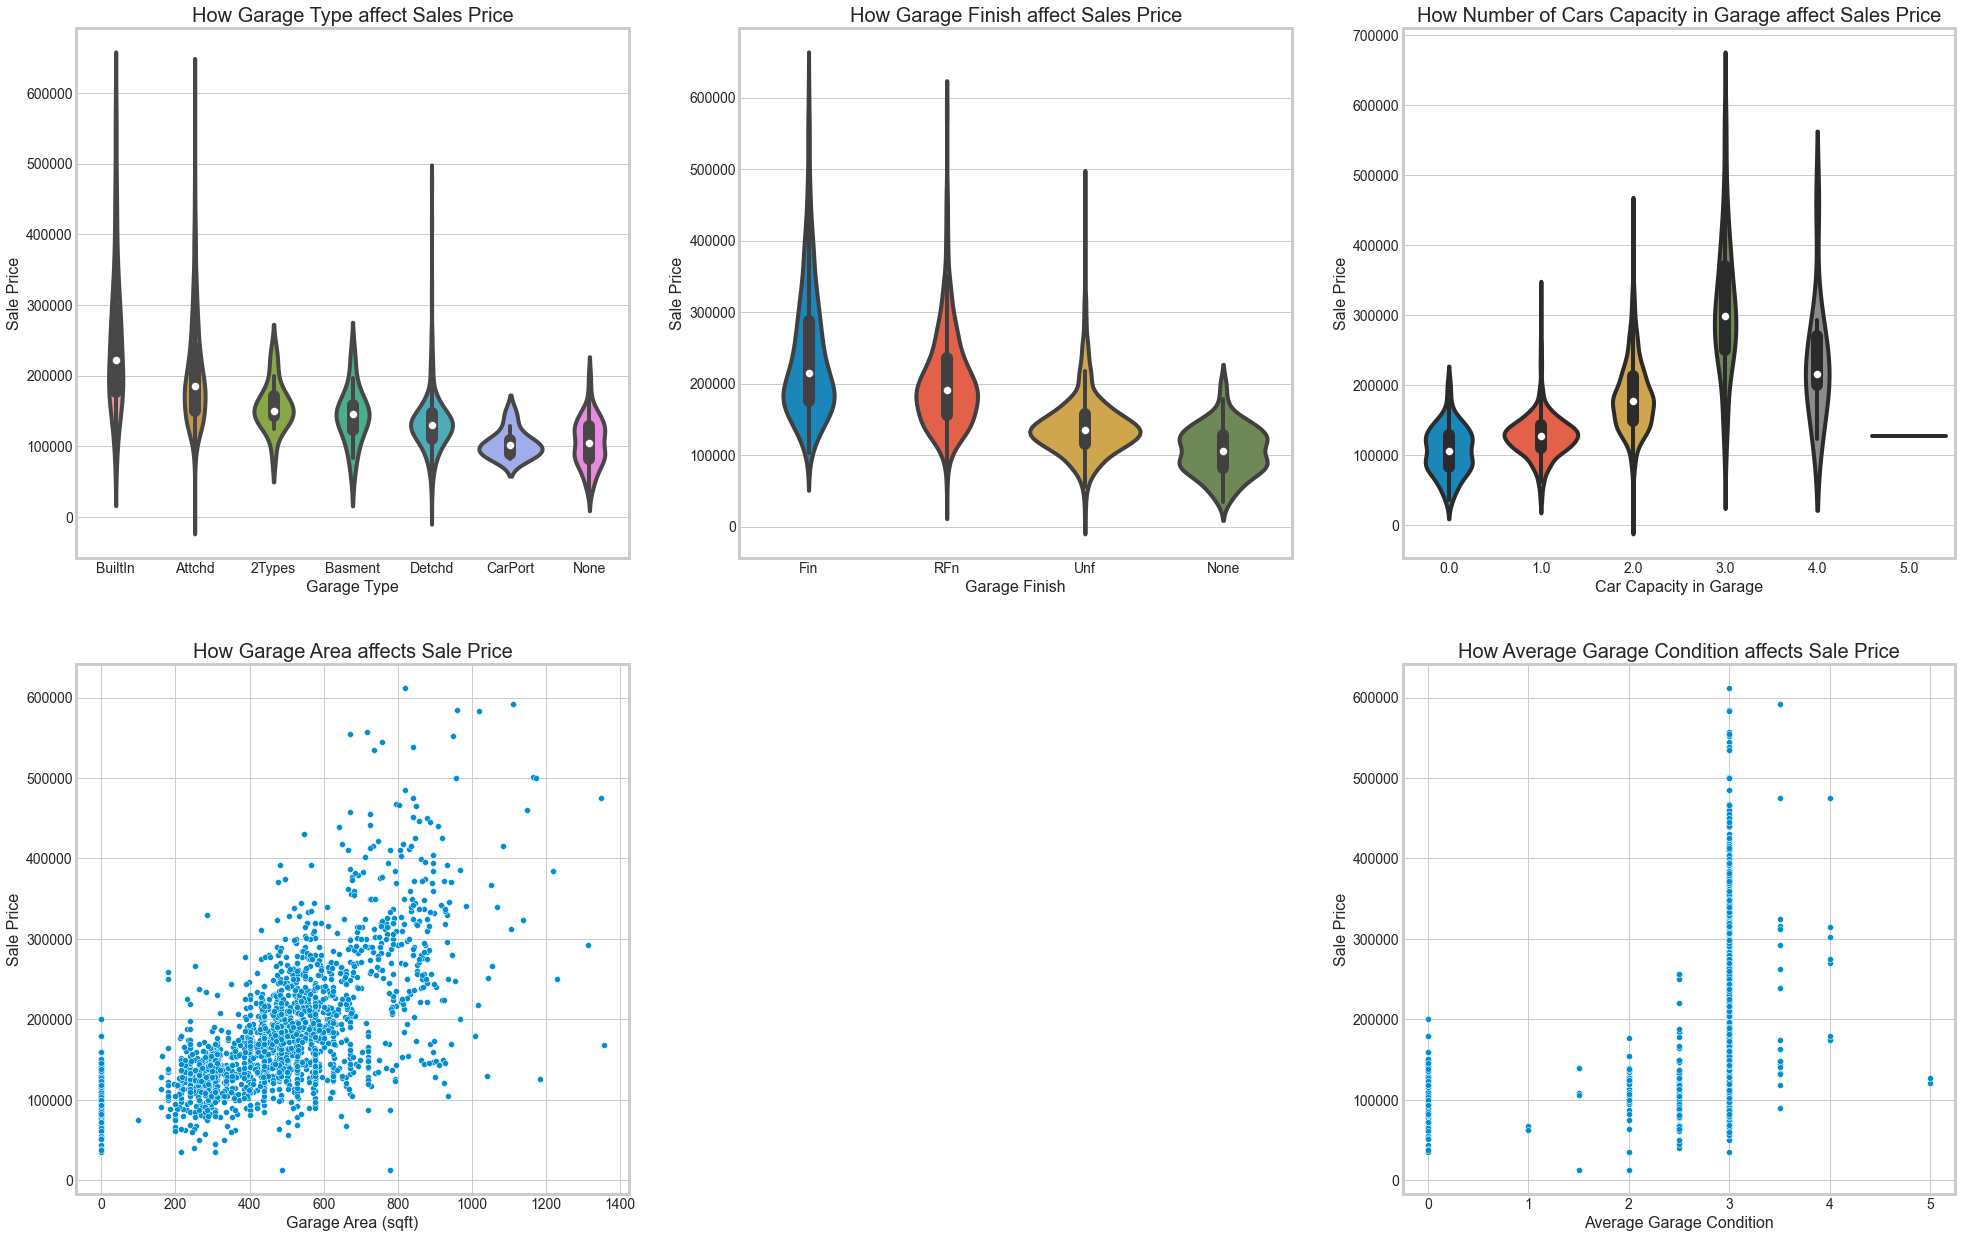

In [1340]:
#view correlation with sale price 
fig, axs = plt.subplots(3,2,figsize = (30,20))

ax1 = plt.subplot(231)
sns.violinplot(ax = ax1, y = 'saleprice',x = 'garage_type', data = train, order =['BuiltIn','Attchd','2Types','Basment','Detchd','CarPort','None'])
ax1.set_title("How Garage Type affect Sales Price", fontsize = 20)
ax1.set_xlabel("Garage Type", fontsize = 16)
ax1.set_ylabel("Sale Price", fontsize = 16)
ax2 = plt.subplot(232)
sns.violinplot(ax = ax2, y = 'saleprice',x = 'garage_finish', data = train, order = ['Fin','RFn','Unf','None'])
ax2.set_title("How Garage Finish affect Sales Price", fontsize = 20)
ax2.set_xlabel("Garage Finish", fontsize = 16)
ax2.set_ylabel("Sale Price", fontsize = 16);
ax3 = plt.subplot(233)
sns.violinplot(ax = ax3, y = 'saleprice',x = 'garage_cars', data = train)
ax3.set_title("How Number of Cars Capacity in Garage affect Sales Price", fontsize = 20)
ax3.set_xlabel("Car Capacity in Garage", fontsize = 16)
ax3.set_ylabel("Sale Price", fontsize = 16);
ax4 = plt.subplot(234)
sns.scatterplot(ax = ax4, y = 'saleprice',x = 'garage_area', data = train)
ax4.set_title("How Garage Area affects Sale Price", fontsize = 20)
ax4.set_xlabel("Garage Area (sqft)", fontsize = 16)
ax4.set_ylabel("Sale Price", fontsize = 16);
ax5 = plt.subplot(236)
sns.scatterplot(ax = ax5, y = 'saleprice',x = 'avg_garage_cond', data = train)
ax5.set_title("How Average Garage Condition affects Sale Price", fontsize = 20)
ax5.set_xlabel("Average Garage Condition", fontsize = 16)
ax5.set_ylabel("Sale Price", fontsize = 16);

Looking at the garage type, median prices differ across categories with builtin garage fetching higher prices than the rest. Second and third more populat garages are attached and two types garage. As expected, garage that is finished fetch the highest median price among the rough and unfinished. 

In [1341]:
#view correlation
train[['garage_cars','garage_area','avg_garage_cond','saleprice']].corr()

garage_cars  garage_area  avg_garage_cond  saleprice
garage_cars         1.000000     0.897310         0.574499   0.648227
garage_area         0.897310     1.000000         0.562466   0.655097
avg_garage_cond     0.574499     0.562466         1.000000   0.278705
saleprice           0.648227     0.655097         0.278705   1.000000

For the continuous variables, garage cars and garage are generally show a positive linear correlation with sales price. Average garage condition didn't really have a linear relationship with sales price. I will drop the average garage condition. 

In [1342]:
# drop original garage quality and condition metric
train.drop(['avg_garage_cond'], axis = 1, inplace = True) 
test.drop(['avg_garage_cond'], axis = 1, inplace = True) 
#check
train.columns
test.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_area', 'exter_qual', 'exter_cond',
       'foundation', 'bsmt_qual', 'total_bsmt_sf', 'heating', 'heating_qc',
       'central_air', 'electrical', '1st_flr_sf', '2nd_flr_sf',
       'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath',
       'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr',
       'kitchen_qual', 'totrms_abvgrd', 'functional', 'garage_type',
       'garage_finish', 'garage_cars', 'garage_area', 'paved_drive',
       'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch',
       'screen_porch', 'mo_sold', 'yr_sold', 'sale_type'],
      dtype='object')

## Feature Engineering

#### Overall and Exterior Material Quality and Condition
The overall_qual feature refers to the overall material and finish quality of the house and overall_cond feature refers to the overall condition of the house. Taking on a house buyer's perspective, I would consider both these factors together. Therefore, i'd take the average of the two to consider both ratings equally. 

In [1343]:
# assign number ratings to exterior quality and condition
train['exter_qual'] = train['exter_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['exter_cond'] = train['exter_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
test['exter_qual'] = test['exter_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
test['exter_cond'] = test['exter_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
# add mean columns
train['avg_hse_cond'] = train[['overall_qual', 'overall_cond']].mean(axis = 1)
train['avg_ext_cond'] = train[['exter_qual', 'exter_cond']].mean(axis = 1)
test['avg_hse_cond'] = test[['overall_qual', 'overall_cond']].mean(axis = 1)
test['avg_ext_cond'] = test[['exter_qual', 'exter_cond']].mean(axis = 1)
# check that it is updated
print(train.shape)
print(test.shape)

(2049, 63)
(879, 62)


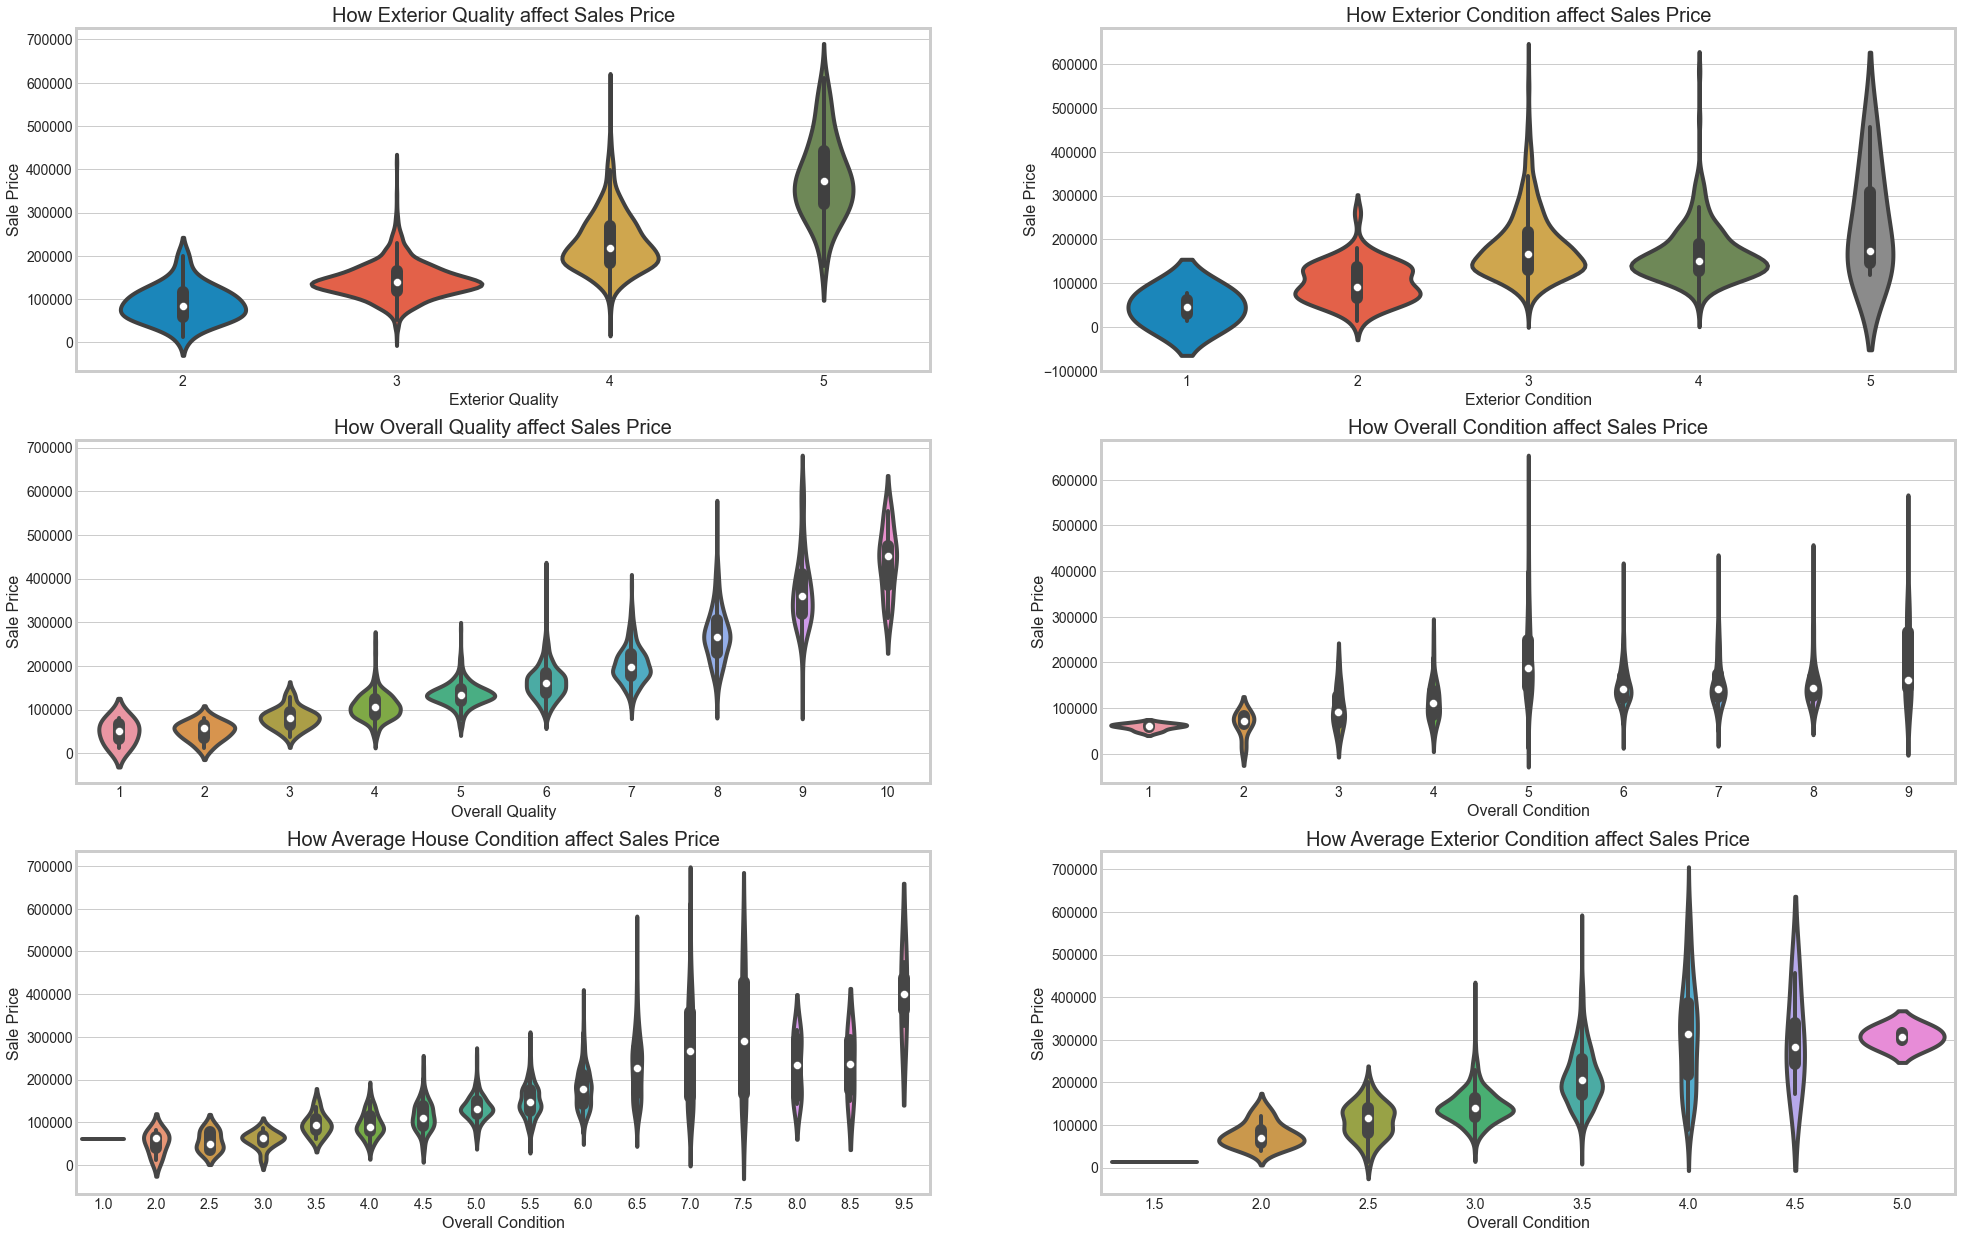

In [1344]:
#view correlation with sale price 
fig, axs = plt.subplots(figsize = (30,20))

ax1 = plt.subplot(321)
sns.violinplot(ax = ax1, y = 'saleprice',x = 'exter_qual', data = train)
ax1.set_title("How Exterior Quality affect Sales Price", fontsize = 20)
ax1.set_xlabel("Exterior Quality", fontsize = 16)
ax1.set_ylabel("Sale Price", fontsize = 16)
ax2 = plt.subplot(322)
sns.violinplot(ax = ax2, y = 'saleprice',x = 'exter_cond', data = train)
ax2.set_title("How Exterior Condition affect Sales Price", fontsize = 20)
ax2.set_xlabel("Exterior Condition", fontsize = 16)
ax2.set_ylabel("Sale Price", fontsize = 16);
ax3 = plt.subplot(323)
sns.violinplot(ax = ax3, y = 'saleprice',x = 'overall_qual', data = train)
ax3.set_title("How Overall Quality affect Sales Price", fontsize = 20)
ax3.set_xlabel("Overall Quality", fontsize = 16)
ax3.set_ylabel("Sale Price", fontsize = 16)
ax4 = plt.subplot(324)
sns.violinplot(ax = ax4, y = 'saleprice',x = 'overall_cond', data = train)
ax4.set_title("How Overall Condition affect Sales Price", fontsize = 20)
ax4.set_xlabel("Overall Condition", fontsize = 16)
ax4.set_ylabel("Sale Price", fontsize = 16);
ax5 = plt.subplot(325)
sns.violinplot(ax = ax5, y = 'saleprice',x = 'avg_hse_cond', data = train)
ax5.set_title("How Average House Condition affect Sales Price", fontsize = 20)
ax5.set_xlabel("Overall Condition", fontsize = 16)
ax5.set_ylabel("Sale Price", fontsize = 16);
ax6 = plt.subplot(326)
sns.violinplot(ax = ax6, y = 'saleprice',x = 'avg_ext_cond', data = train)
ax6.set_title("How Average Exterior Condition affect Sales Price", fontsize = 20)
ax6.set_xlabel("Overall Condition", fontsize = 16)
ax6.set_ylabel("Sale Price", fontsize = 16);

In [1345]:
#view correlation
train[['exter_qual','exter_cond','overall_qual','overall_cond','avg_hse_cond','avg_ext_cond','saleprice']].corr()

exter_qual  exter_cond  overall_qual  overall_cond  \
exter_qual      1.000000    0.035274      0.738370     -0.155686   
exter_cond      0.035274    1.000000      0.021115      0.412300   
overall_qual    0.738370    0.021115      1.000000     -0.081723   
overall_cond   -0.155686    0.412300     -0.081723      1.000000   
avg_hse_cond    0.508017    0.281024      0.770598      0.572214   
avg_ext_cond    0.849158    0.557764      0.624387      0.088588   
saleprice       0.715048    0.036393      0.803462     -0.097093   

              avg_hse_cond  avg_ext_cond  saleprice  
exter_qual        0.508017      0.849158   0.715048  
exter_cond        0.281024      0.557764   0.036393  
overall_qual      0.770598      0.624387   0.803462  
overall_cond      0.572214      0.088588  -0.097093  
avg_hse_cond      1.000000      0.570429   0.599047  
avg_ext_cond      0.570429      1.000000   0.613091  
saleprice         0.599047      0.613091   1.000000

From the above plots and correlation matrix, we can see that the overall quality has the strongest correlation (0.8) with sales price. Exterior quality also has a relatively strong correlation with sales price (0.7). I will drop the exterior condition and overall condition which has little to no correlation with sales price. The lack of correlation of these has resulted a drop in strength of correlation for the average house condition and average exterior condition. I will drop all columns except for the overall quality and exterior quality. 

This suggests that compared to the condition, home buyers generally place a high price on quality. 

In [1346]:
#drop original columns
train.drop(['overall_cond','exter_cond','avg_hse_cond','avg_ext_cond'], axis = 1, inplace = True)
test.drop(['overall_cond','exter_cond','avg_hse_cond','avg_ext_cond'], axis = 1, inplace = True)
#check
print(train.columns)
print(test.columns)

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'year_built', 'year_remod/add',
       'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd',
       'mas_vnr_area', 'exter_qual', 'foundation', 'bsmt_qual',
       'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd',
       'functional', 'garage_type', 'garage_finish', 'garage_cars',
       'garage_area', 'paved_drive', 'wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', '3ssn_porch', 'screen_porch', 'mo_sold', 'yr_sold',
       'sale_type', 'saleprice'],
      dtype='object')
Index(['id', 'pid', 'ms_su

#### Year Built, Remodelled and Month Sold and Year Sold

For the year built ('yearbuilt') and year remodelled ('yearemod/add') column, the values of the latter is the former if there is no remodelling. Since remodelling would effectively make the house brand new, they are effectively similar. With the year_sold column, we can compute the age of the house. 

In [1347]:
# engineer age of the house by getting the difference between year sold and year remodelled
train['age'] = train['yr_sold']- train['year_built']
test['age'] = test['yr_sold']- test['year_built']
#check if any <0
print(train[train['age']<0])
print(test[test['age']<0])

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_area, street, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_area, exter_qual, foundation, bsmt_qual, total_bsmt_sf, heating, heating_qc, central_air, electrical, 1st_flr_sf, 2nd_flr_sf, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, garage_type, garage_finish, garage_cars, garage_area, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, 3ssn_porch, screen_porch, mo_sold, yr_sold, sale_type, saleprice, age]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_area, street, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, 

<Figure size 1440x720 with 0 Axes>

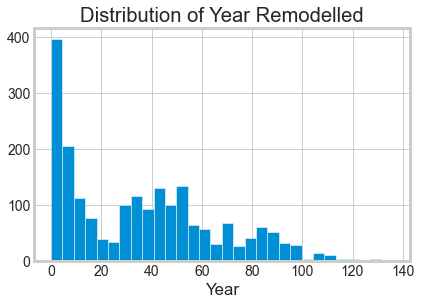

In [1348]:
# view distribution of engineered feature
plt.figure(figsize = (20,10))
train.hist(column = 'age', bins = 30)
plt.title("Distribution of Year Remodelled")
plt.xlabel("Year");

Text(0, 0.5, 'Sales Price')

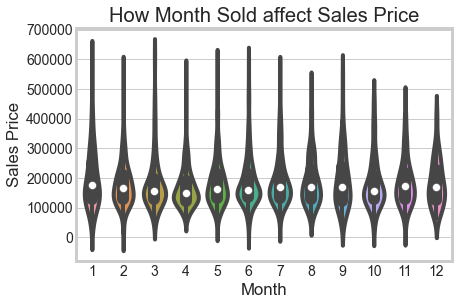

In [1349]:
# plot sales price against month sold
sns.violinplot(y = 'saleprice',x = 'mo_sold', data = train)
plt.title("How Month Sold affect Sales Price")
plt.xlabel("Month")
plt.ylabel("Sales Price")

The median sales price across all months are relatively constant, so there is no seasonality in sale of houses. This makes sense since a house is not a frivolous purchase and is taken based on need rather than a want. I will drop this column as it would not be useful in predicting sale prices. 

In [1350]:
#drop year_built column
train.drop(['year_built','year_remod/add','mo_sold','yr_sold'], axis = 1, inplace = True) 
test.drop(['year_built','year_remod/add','mo_sold','yr_sold'], axis = 1, inplace = True) 

#### ID and PID

The ID represents the unique identifier for each house but here, we can use pandas' indexing as the unique identifier for the house. So we drop this column.

There isn't enough description what PID stands for and it would be hard to make inference or prediction out of any observations made from this column, so I will drop this column. 

In [1351]:
#drop pid column
train.drop(['id','pid'], axis = 1, inplace = True) 
test.drop(['id','pid'], axis = 1, inplace = True) 
#check
print(train.columns)
print(test.columns)

Index(['ms_subclass', 'ms_zoning', 'lot_area', 'street', 'lot_shape',
       'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood',
       'condition_1', 'condition_2', 'bldg_type', 'house_style',
       'overall_qual', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_area', 'exter_qual', 'foundation', 'bsmt_qual',
       'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd',
       'functional', 'garage_type', 'garage_finish', 'garage_cars',
       'garage_area', 'paved_drive', 'wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', '3ssn_porch', 'screen_porch', 'sale_type',
       'saleprice', 'age'],
      dtype='object')
Index(['ms_subclass', 'ms_zoning', 'lot_area', 'street', 'lot_shape',
       'land_contour', 

### Combine square footage for whole house, porch and total bathrooms
Buyers do not necessarily distinguish between area of second floor or first floor, and would rather look at the total house area in their consideration. The sum of the first floor sq ft, second floor sq ft and low quality finished sf is the ground living area. So I will add this to the area of basement to get the area of the total house. Similarly, I will combine the area for the different types of porch.

I will also add the total bathrooms for the house, where half bathrooms will be indicated as 0.5.

In [1352]:
#add total house sq
train['total_hse_area'] = train['gr_liv_area'] + train['total_bsmt_sf'] 
test['total_hse_area'] = test['gr_liv_area'] + test['total_bsmt_sf'] 
#add total porch area
train['total_porch&deck_area'] = train.loc[:, ['wood_deck_sf','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch']].sum(axis = 1)
test['total_porch&deck_area'] = test.loc[:, ['wood_deck_sf','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch']].sum(axis = 1)
#add total bathrooms in house
train['total_bathrms'] = train['bsmt_full_bath'] + train['bsmt_half_bath']*0.5 + train['full_bath'] + train['half_bath']*0.5
test['total_bathrms'] = test['bsmt_full_bath'] + test['bsmt_half_bath']*0.5 + test['full_bath'] + test['half_bath']*0.5

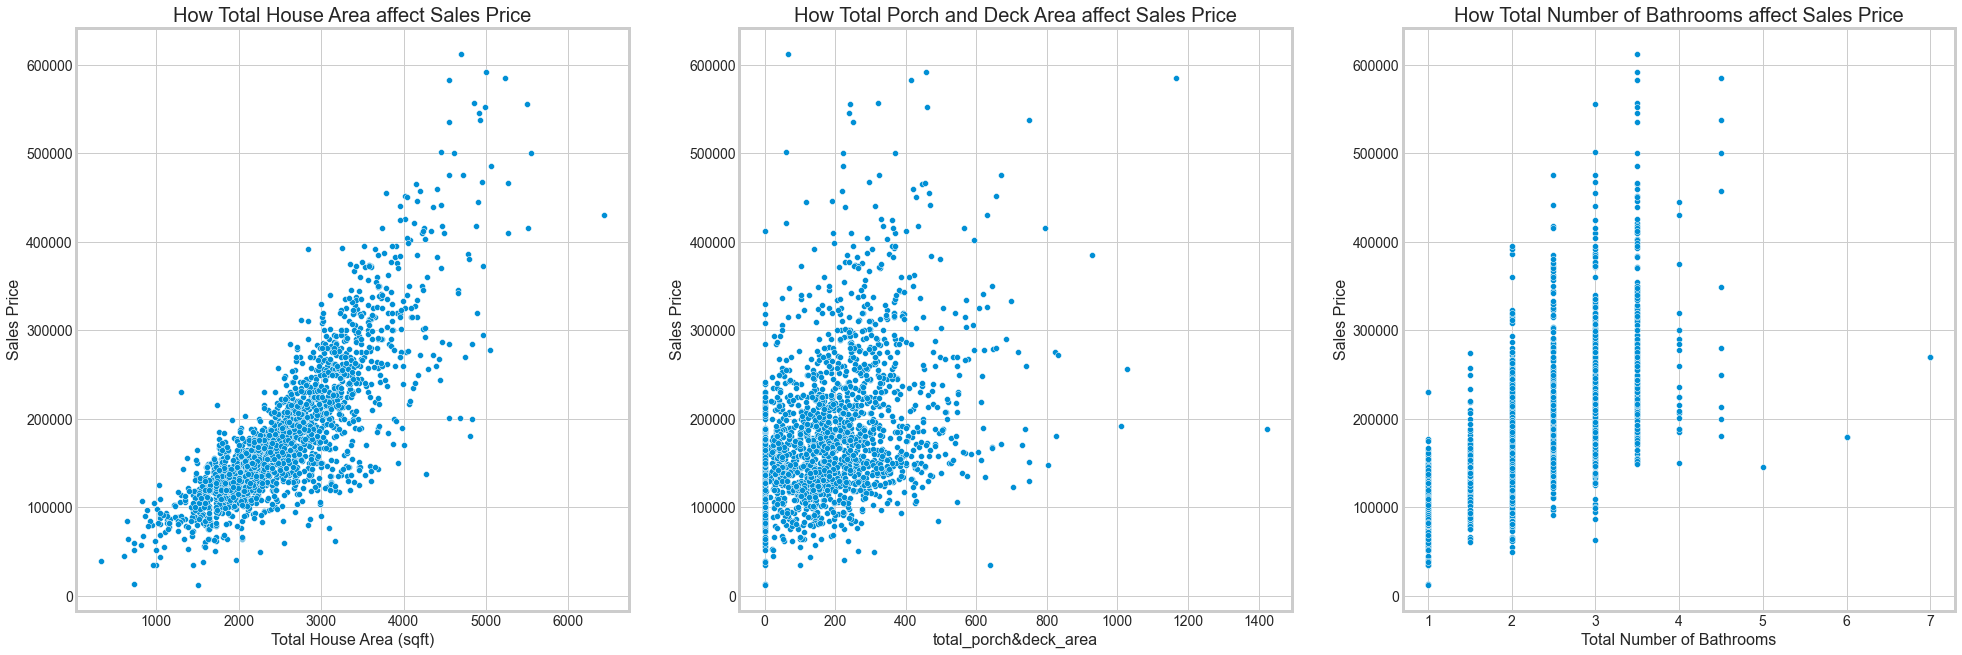

In [1353]:
# view correlation with sale price
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (30,10))
# plot sales price against total house area
sns.scatterplot(ax = ax1, y = 'saleprice',x = 'total_hse_area', data = train)
ax1.set_title("How Total House Area affect Sales Price", fontsize = 20)
ax1.set_xlabel("Total House Area (sqft)", fontsize = 16)
ax1.set_ylabel("Sales Price", fontsize = 16)

# plot sales price against total porch and deck area available
sns.scatterplot(ax = ax2, y = 'saleprice',x = 'total_porch&deck_area', data = train)
ax2.set_title("How Total Porch and Deck Area affect Sales Price", fontsize = 20)
ax2.set_xlabel("total_porch&deck_area", fontsize = 16)
ax2.set_ylabel("Sales Price", fontsize = 16)

# plot sales price against year remodelled
sns.scatterplot(ax = ax3, y = 'saleprice',x = 'total_bathrms', data = train)
ax3.set_title("How Total Number of Bathrooms affect Sales Price", fontsize = 20)
ax3.set_xlabel("Total Number of Bathrooms", fontsize = 16)
ax3.set_ylabel("Sales Price", fontsize = 16);

In [1354]:
#pearson correlation
train[['total_hse_area','total_porch&deck_area','total_bathrms','saleprice']].corr()

total_hse_area  total_porch&deck_area  total_bathrms  \
total_hse_area               1.000000               0.397137       0.600929   
total_porch&deck_area        0.397137               1.000000       0.302437   
total_bathrms                0.600929               0.302437       1.000000   
saleprice                    0.825818               0.409752       0.632542   

                       saleprice  
total_hse_area          0.825818  
total_porch&deck_area   0.409752  
total_bathrms           0.632542  
saleprice               1.000000

From above plots, we see a relatively strong correlation of total house area (0.8) with sales price. Total number of bathrooms has a positive correlation with sale price (0.6). However, the porch and deck area did not have a relatively strong correlation with the sales price (0.4). I will drop the total porch and deck area from the model. 

In [1355]:
#remove subsumed columns
train.drop(['1st_flr_sf','2nd_flr_sf','low_qual_fin_sf', 'gr_liv_area','total_bsmt_sf','wood_deck_sf','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch','bsmt_full_bath','bsmt_half_bath','full_bath','half_bath','total_porch&deck_area'], axis = 1, inplace = True)
test.drop(['1st_flr_sf','2nd_flr_sf','low_qual_fin_sf', 'gr_liv_area','total_bsmt_sf','wood_deck_sf','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch','bsmt_full_bath','bsmt_half_bath','full_bath','half_bath','total_porch&deck_area'], axis = 1, inplace = True)
# check
train.columns
test.columns

Index(['ms_subclass', 'ms_zoning', 'lot_area', 'street', 'lot_shape',
       'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood',
       'condition_1', 'condition_2', 'bldg_type', 'house_style',
       'overall_qual', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_area', 'exter_qual', 'foundation', 'bsmt_qual',
       'heating', 'heating_qc', 'central_air', 'electrical', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'garage_type', 'garage_finish', 'garage_cars', 'garage_area',
       'paved_drive', 'sale_type', 'age', 'total_hse_area', 'total_bathrms'],
      dtype='object')

### Land contour, shape and area
I look at land contour (flatness of the property), lot configuration,lot shape, lot area and land slope to determine if these have any correlation with the target variable, sales price.

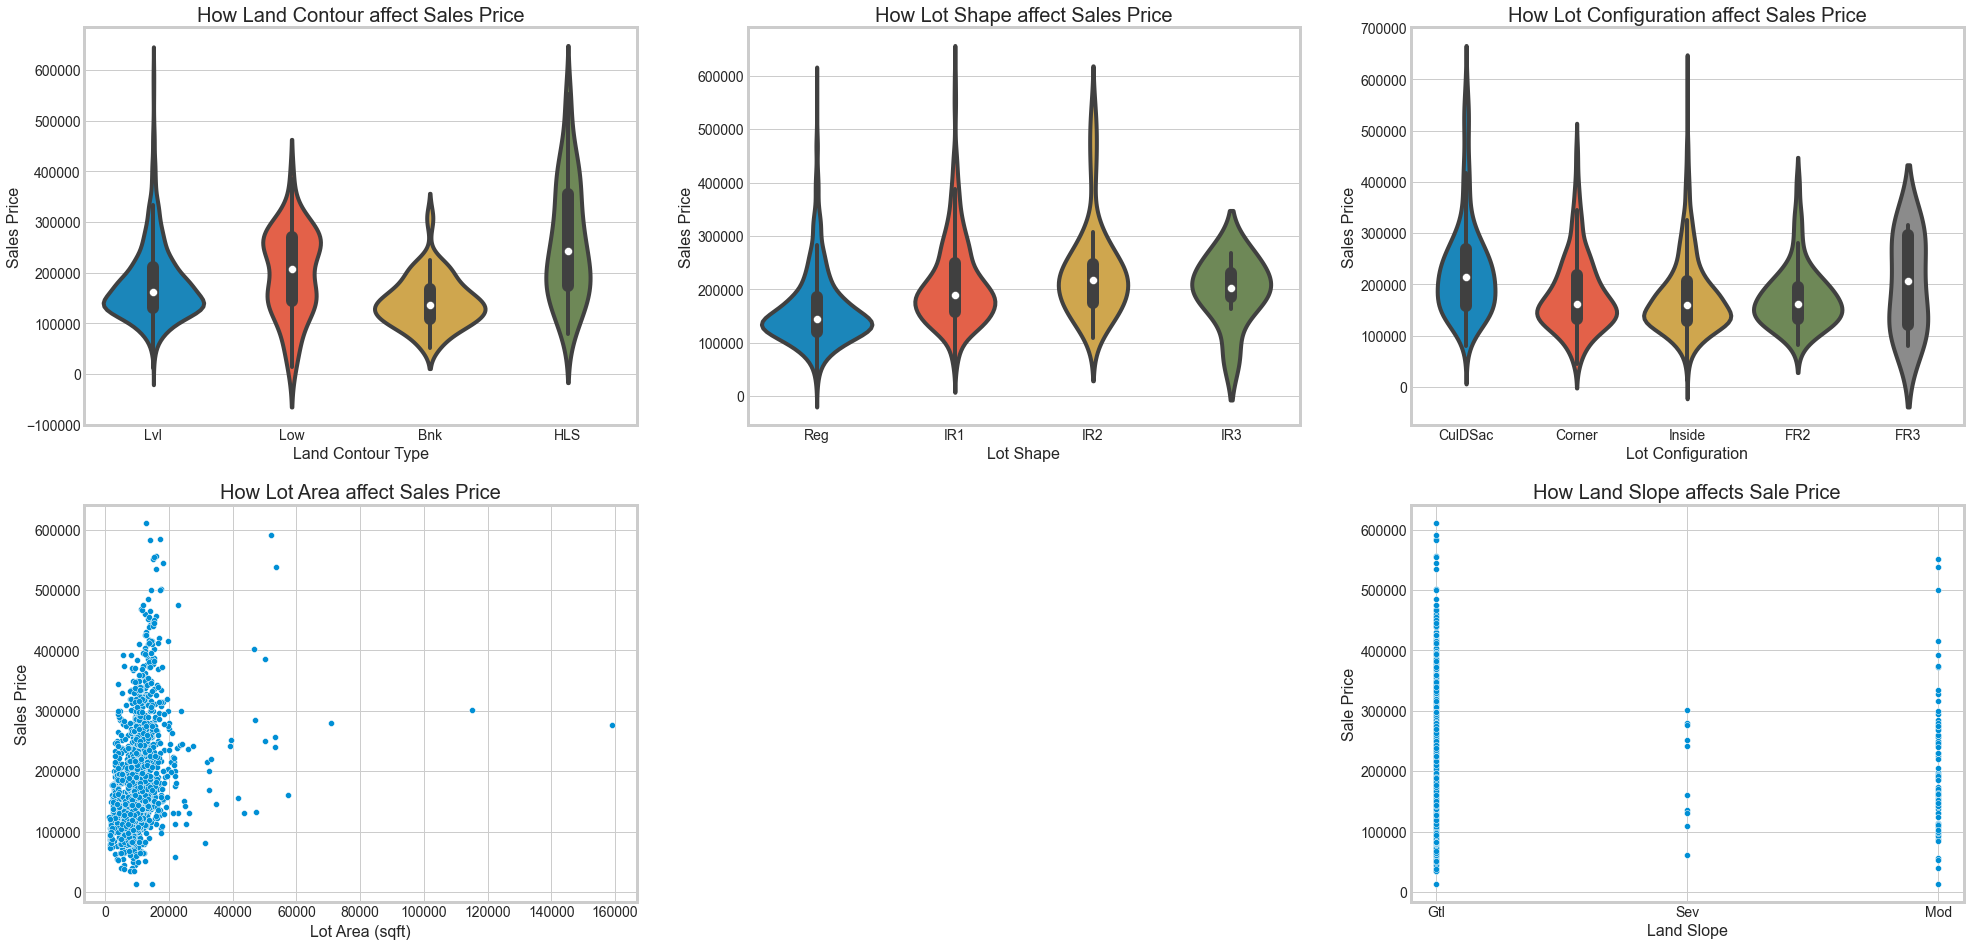

In [1356]:
fig, axs = plt.subplots(figsize = (30,15))
# plot sales price against land contour
ax1 = plt.subplot(231)
sns.violinplot(ax = ax1, y = 'saleprice',x = 'land_contour', data = train, order = ['Lvl','Low','Bnk','HLS'])
ax1.set_title("How Land Contour affect Sales Price", fontsize = 20)
ax1.set_xlabel("Land Contour Type", fontsize = 16)
ax1.set_ylabel("Sales Price", fontsize = 16)

# plot sales price against lot shape
ax2 = plt.subplot(232)
sns.violinplot(ax = ax2, y = 'saleprice',x = 'lot_shape', data = train, order = ['Reg', 'IR1', 'IR2', 'IR3'])
ax2.set_title("How Lot Shape affect Sales Price", fontsize = 20)
ax2.set_xlabel("Lot Shape", fontsize = 16)
ax2.set_ylabel("Sales Price", fontsize = 16)

# plot sales price against lot configuration
ax3 = plt.subplot(233)
sns.violinplot(ax = ax3, y = 'saleprice',x = 'lot_config', data = train, order = ['CulDSac', 'Corner', 'Inside', 'FR2','FR3'])
ax3.set_title("How Lot Configuration affect Sales Price", fontsize = 20)
ax3.set_xlabel("Lot Configuration", fontsize = 16)
ax3.set_ylabel("Sales Price", fontsize = 16);

# plot sales price against lot area
ax4 = plt.subplot(234)
sns.scatterplot(ax = ax4, y = 'saleprice',x = 'lot_area', data = train)
ax4.set_title("How Lot Area affect Sales Price", fontsize = 20)
ax4.set_xlabel("Lot Area (sqft)", fontsize = 16)
ax4.set_ylabel("Sales Price", fontsize = 16);

# plot sales price against land slope
ax5 = plt.subplot(236)
sns.scatterplot(ax = ax5, y = 'saleprice',x = 'land_slope', data = train)
ax5.set_title("How Land Slope affects Sale Price", fontsize = 20)
ax5.set_xlabel("Land Slope", fontsize = 16)
ax5.set_ylabel("Sale Price", fontsize = 16);

In [1357]:
#pearson correlation
train[['lot_area','saleprice']].corr()

lot_area  saleprice
lot_area   1.000000   0.303744
saleprice  0.303744   1.000000

From the above violin plots, there is no clear correlation with sales price and the median sale price is relatively in the same range across all categories. There is also a weak correlation between lot area and sales price. As these would not be useful in the regression model, I will drop these columns. 

In [1358]:
#remove columns
train.drop(['land_contour','lot_shape','lot_config','lot_area','land_slope'], axis = 1, inplace = True)
test.drop(['land_contour','lot_shape','lot_config','lot_area','land_slope'], axis = 1, inplace = True)
#check
print(train.columns)
print(test.columns)

Index(['ms_subclass', 'ms_zoning', 'street', 'utilities', 'neighborhood',
       'condition_1', 'condition_2', 'bldg_type', 'house_style',
       'overall_qual', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_area', 'exter_qual', 'foundation', 'bsmt_qual',
       'heating', 'heating_qc', 'central_air', 'electrical', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'garage_type', 'garage_finish', 'garage_cars', 'garage_area',
       'paved_drive', 'sale_type', 'saleprice', 'age', 'total_hse_area',
       'total_bathrms'],
      dtype='object')
Index(['ms_subclass', 'ms_zoning', 'street', 'utilities', 'neighborhood',
       'condition_1', 'condition_2', 'bldg_type', 'house_style',
       'overall_qual', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_area', 'exter_qual', 'foundation', 'bsmt_qual',
       'heating', 'heating_qc', 'central_air', 'electrical', 'bedroom_abvgr',
       'kitche

In [1359]:
train.shape

(2049, 37)

### MS Subclass and Zoning, Neighbourhood, Street
I look at ms subclass, zoning, neighbourhood and street type to determine if these have any correlation with the target variable, sales price.

In [1360]:
#convert mssubclass to string
train['ms_subclass'] = train['ms_subclass'].astype(str)

Text(0, 0.5, 'Sales Price')

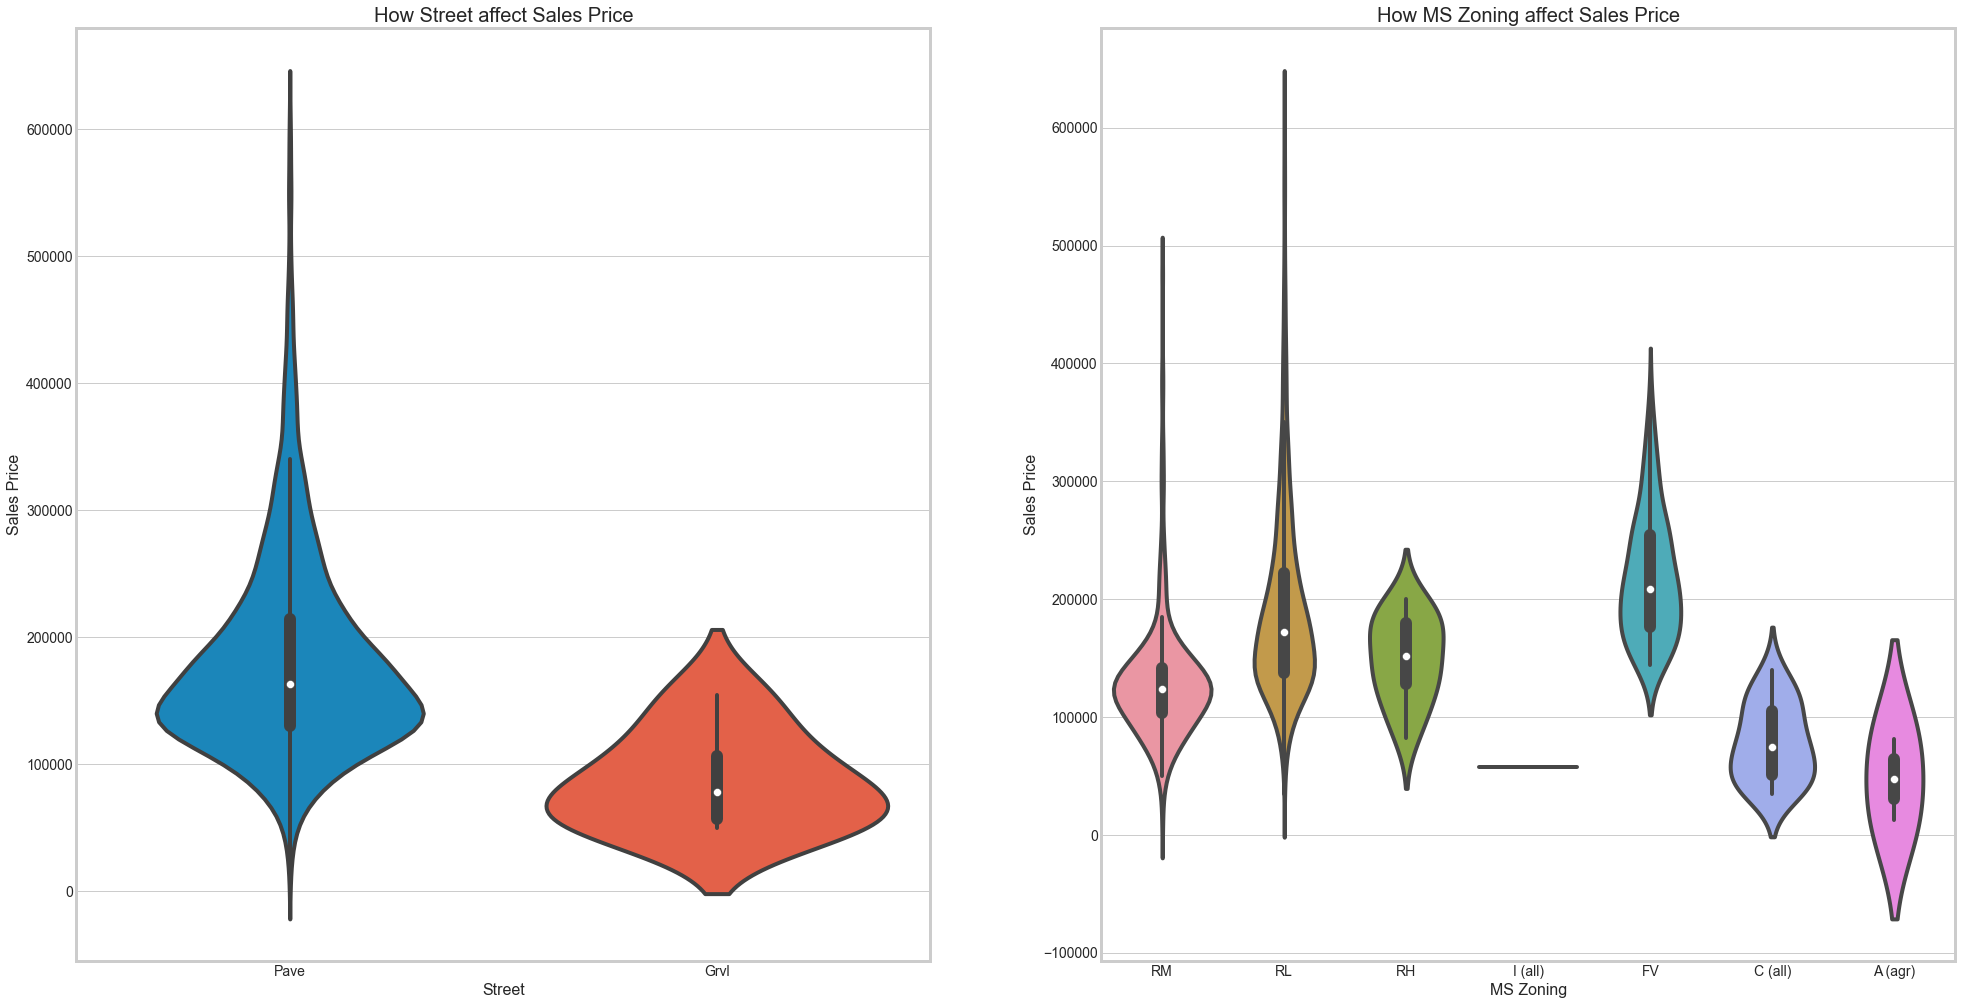

In [1363]:
fig, axs = plt.subplots(figsize = (30,16))

# plot sales price against street
ax1 = plt.subplot(121)
sns.violinplot(ax = ax1, y = 'saleprice',x = 'street', data = train)
ax1.set_title("How Street affect Sales Price", fontsize = 20)
ax1.set_xlabel("Street", fontsize = 16)
ax1.set_ylabel("Sales Price", fontsize = 16);

# plot sales price against MS zoning
ax2 = plt.subplot(122)
sns.violinplot(ax = ax2, y = 'saleprice',x = 'ms_zoning', data = train, order=['RM','RL','RH','I (all)','FV','C (all)','A (agr)'])
ax2.set_title("How MS Zoning affect Sales Price", fontsize = 20)
ax2.set_xlabel("MS Zoning", fontsize = 16)
ax2.set_ylabel("Sales Price", fontsize = 16)

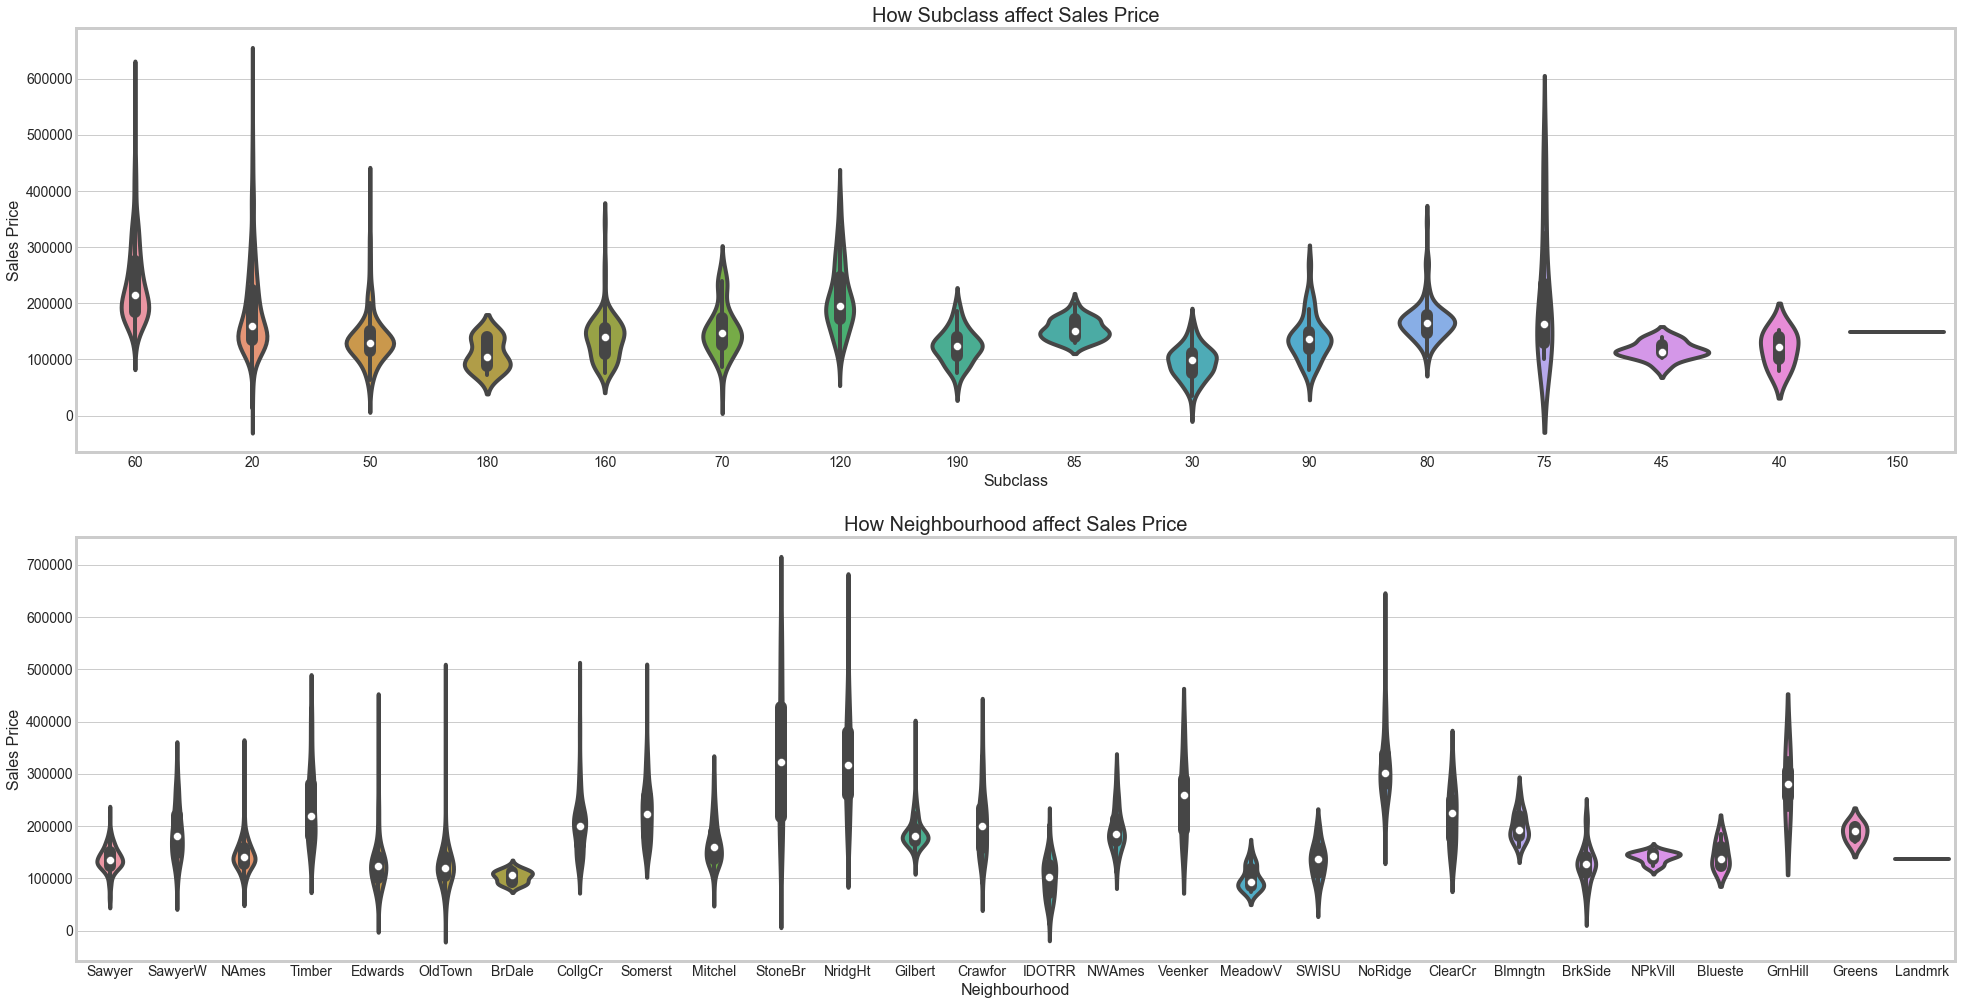

In [1364]:
fig, axs = plt.subplots(figsize = (30,16))
# plot sales price against MS subclass
ax1 = plt.subplot(211)
sns.violinplot(ax = ax1, y = 'saleprice',x = 'ms_subclass', data = train)
ax1.set_title("How Subclass affect Sales Price", fontsize = 20)
ax1.set_xlabel("Subclass", fontsize = 16)
ax1.set_ylabel("Sales Price", fontsize = 16)

# plot sales price against neighbourhood
ax2 = plt.subplot(212)
sns.violinplot(ax = ax2, y = 'saleprice',x = 'neighborhood', data = train)
ax2.set_title("How Neighbourhood affect Sales Price", fontsize = 20)
ax2.set_xlabel("Neighbourhood", fontsize = 16)
ax2.set_ylabel("Sales Price", fontsize = 16);

Different subclasses have a different range of sales prices. However, median of each subclass remains in the same range of sales price of 100K to 200K. Therefore is unlikely to have a huge impact on regression. 

For MS Zoning, it appears that FV (ie. floating village residential) fetched the highest median price than other zones. Agriculture zone on the other hand, has the lowest median sale price, compared to others. 

I will drop subclass and street. Subclass is dropped as there is not much variance in the different categories compared to neighbourhood. Also for street, that is paved or gravel, is not likely a huge consideration when buying a house, compared to other features. 

In [1250]:
#remove columns
train.drop(['ms_subclass','street'], axis = 1, inplace = True)
test.drop(['ms_subclass','street'], axis = 1, inplace = True)
#check
print(train.columns)
print(test.columns)

Index(['ms_zoning', 'utilities', 'neighborhood', 'condition_1', 'condition_2',
       'bldg_type', 'house_style', 'overall_qual', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_area', 'exter_qual',
       'foundation', 'bsmt_qual', 'heating', 'heating_qc', 'central_air',
       'electrical', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'garage_type', 'garage_finish',
       'garage_cars', 'garage_area', 'paved_drive', 'sale_type', 'saleprice',
       'age', 'total_hse_area', 'total_bathrms'],
      dtype='object')
Index(['ms_zoning', 'utilities', 'neighborhood', 'condition_1', 'condition_2',
       'bldg_type', 'house_style', 'overall_qual', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_area', 'exter_qual',
       'foundation', 'bsmt_qual', 'heating', 'heating_qc', 'central_air',
       'electrical', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 

### Proximity to main road, Building Type and House Style
I look at proximity to main road (ie. condition 1 and condition 2), building type and house style to determine if these have any correlation with the target variable, sales price.

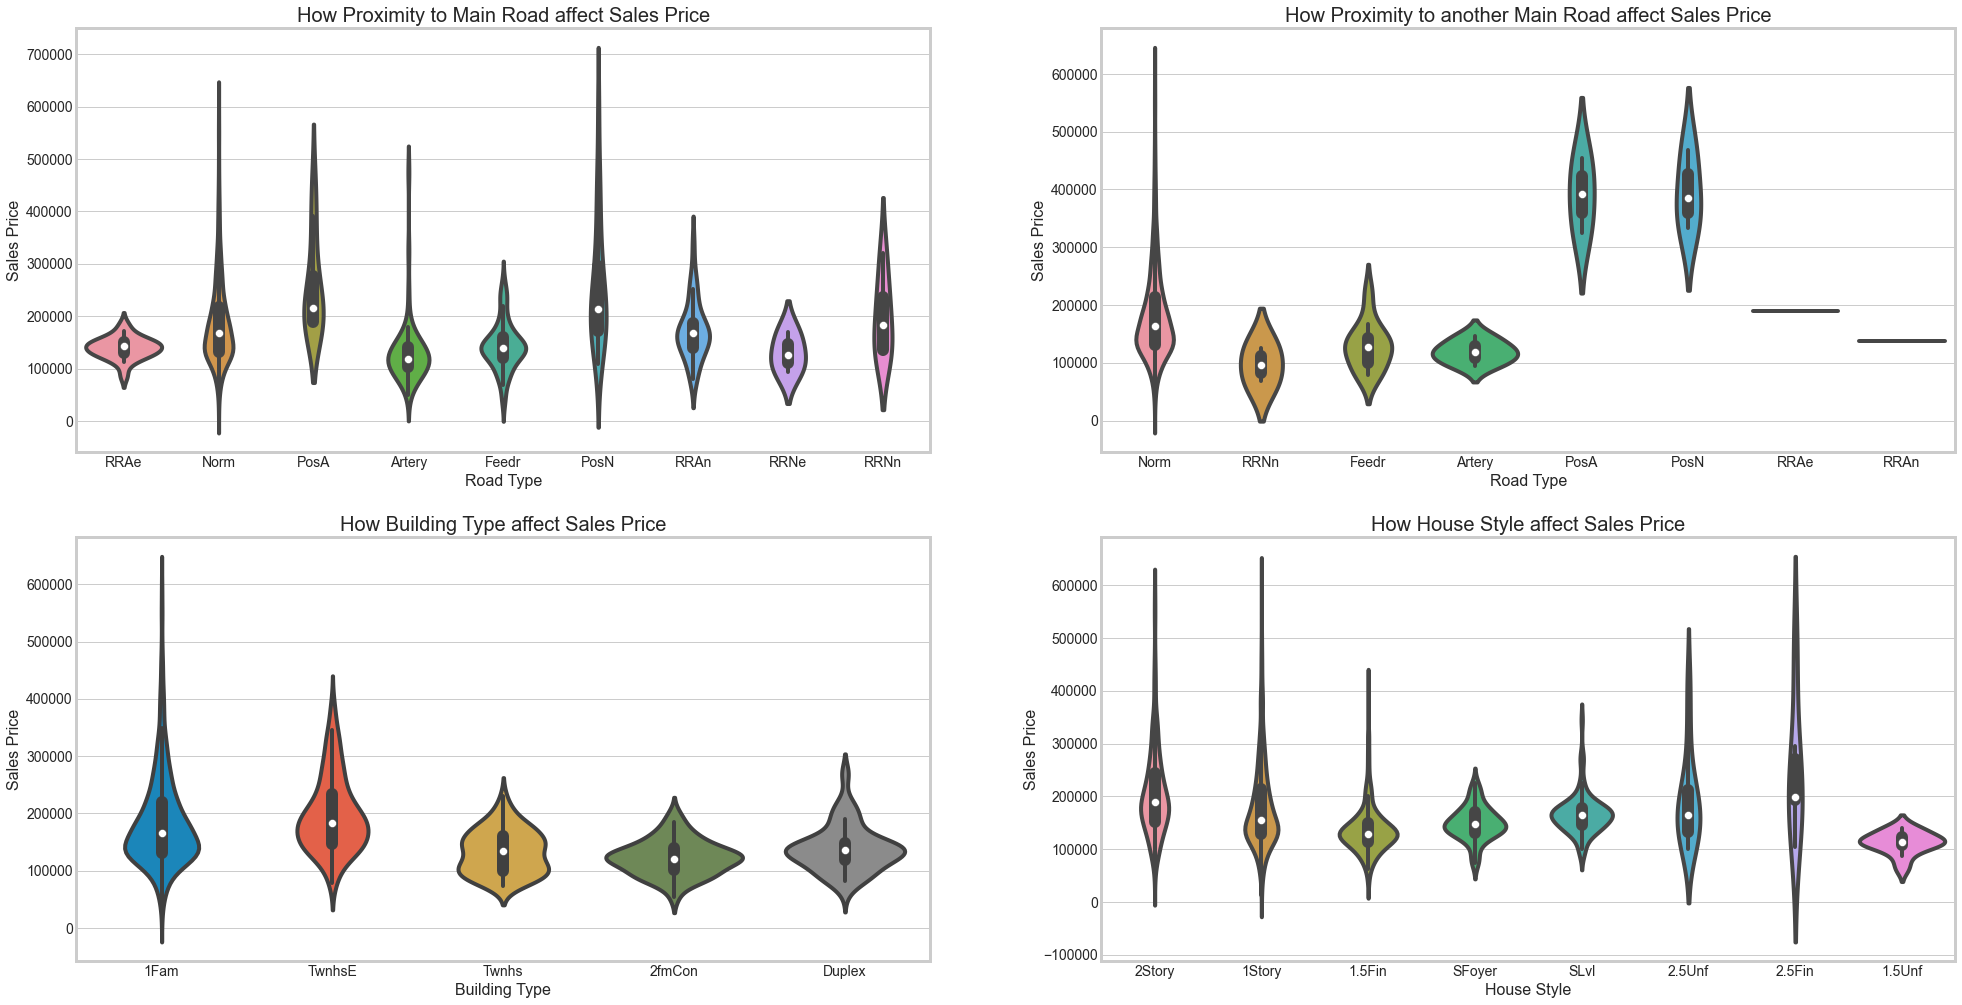

In [1251]:
fig, axs = plt.subplots(figsize = (30,16))
# plot sales price against proximity to road
ax1 = plt.subplot(221)
sns.violinplot(ax = ax1, y = 'saleprice',x = 'condition_1', data = train)
ax1.set_title("How Proximity to Main Road affect Sales Price", fontsize = 20)
ax1.set_xlabel("Road Type", fontsize = 16)
ax1.set_ylabel("Sales Price", fontsize = 16)

# plot sales price against proximity to another road
ax2 = plt.subplot(222)
sns.violinplot(ax = ax2, y = 'saleprice',x = 'condition_2', data = train)
ax2.set_title("How Proximity to another Main Road affect Sales Price", fontsize = 20)
ax2.set_xlabel("Road Type", fontsize = 16)
ax2.set_ylabel("Sales Price", fontsize = 16)

# plot sales price against building type
ax3 = plt.subplot(223)
sns.violinplot(ax = ax3, y = 'saleprice',x = 'bldg_type', data = train)
ax3.set_title("How Building Type affect Sales Price", fontsize = 20)
ax3.set_xlabel("Building Type", fontsize = 16)
ax3.set_ylabel("Sales Price", fontsize = 16);

# plot sales price against house style
ax4 = plt.subplot(224)
sns.violinplot(ax = ax4, y = 'saleprice',x = 'house_style', data = train)
ax4.set_title("How House Style affect Sales Price", fontsize = 20)
ax4.set_xlabel("House Style", fontsize = 16)
ax4.set_ylabel("Sales Price", fontsize = 16);

While the median sales prices for most plots here are within a range across categories, the road type for proximity to another main road showed that PosA (ie. Adjacent to positive off site feature) and PosN (ie. Near positive off-site feature - park, greenbelt) can fetch a much higher median price compared to other road types. 

I will drop all except for 'condition2'.

In [1252]:
#remove columns
train.drop(['condition_1','bldg_type','house_style'], axis = 1, inplace = True)
test.drop(['condition_1','bldg_type','house_style'], axis = 1, inplace = True)
#check
print(train.columns)
print(test.columns)

Index(['ms_zoning', 'utilities', 'neighborhood', 'condition_2', 'overall_qual',
       'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd',
       'mas_vnr_area', 'exter_qual', 'foundation', 'bsmt_qual', 'heating',
       'heating_qc', 'central_air', 'electrical', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'garage_type', 'garage_finish', 'garage_cars', 'garage_area',
       'paved_drive', 'sale_type', 'saleprice', 'age', 'total_hse_area',
       'total_bathrms'],
      dtype='object')
Index(['ms_zoning', 'utilities', 'neighborhood', 'condition_2', 'overall_qual',
       'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd',
       'mas_vnr_area', 'exter_qual', 'foundation', 'bsmt_qual', 'heating',
       'heating_qc', 'central_air', 'electrical', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'garage_type', 'garage_finish', 'garage_cars', 'garage_area',
       'paved_drive', 's

### Roof style and Material, and Exterior 1 and 2 covering of house
I look at roof style and material, along with exterior covering (1 or 2) to determine if these have any correlation with the target variable, sales price.

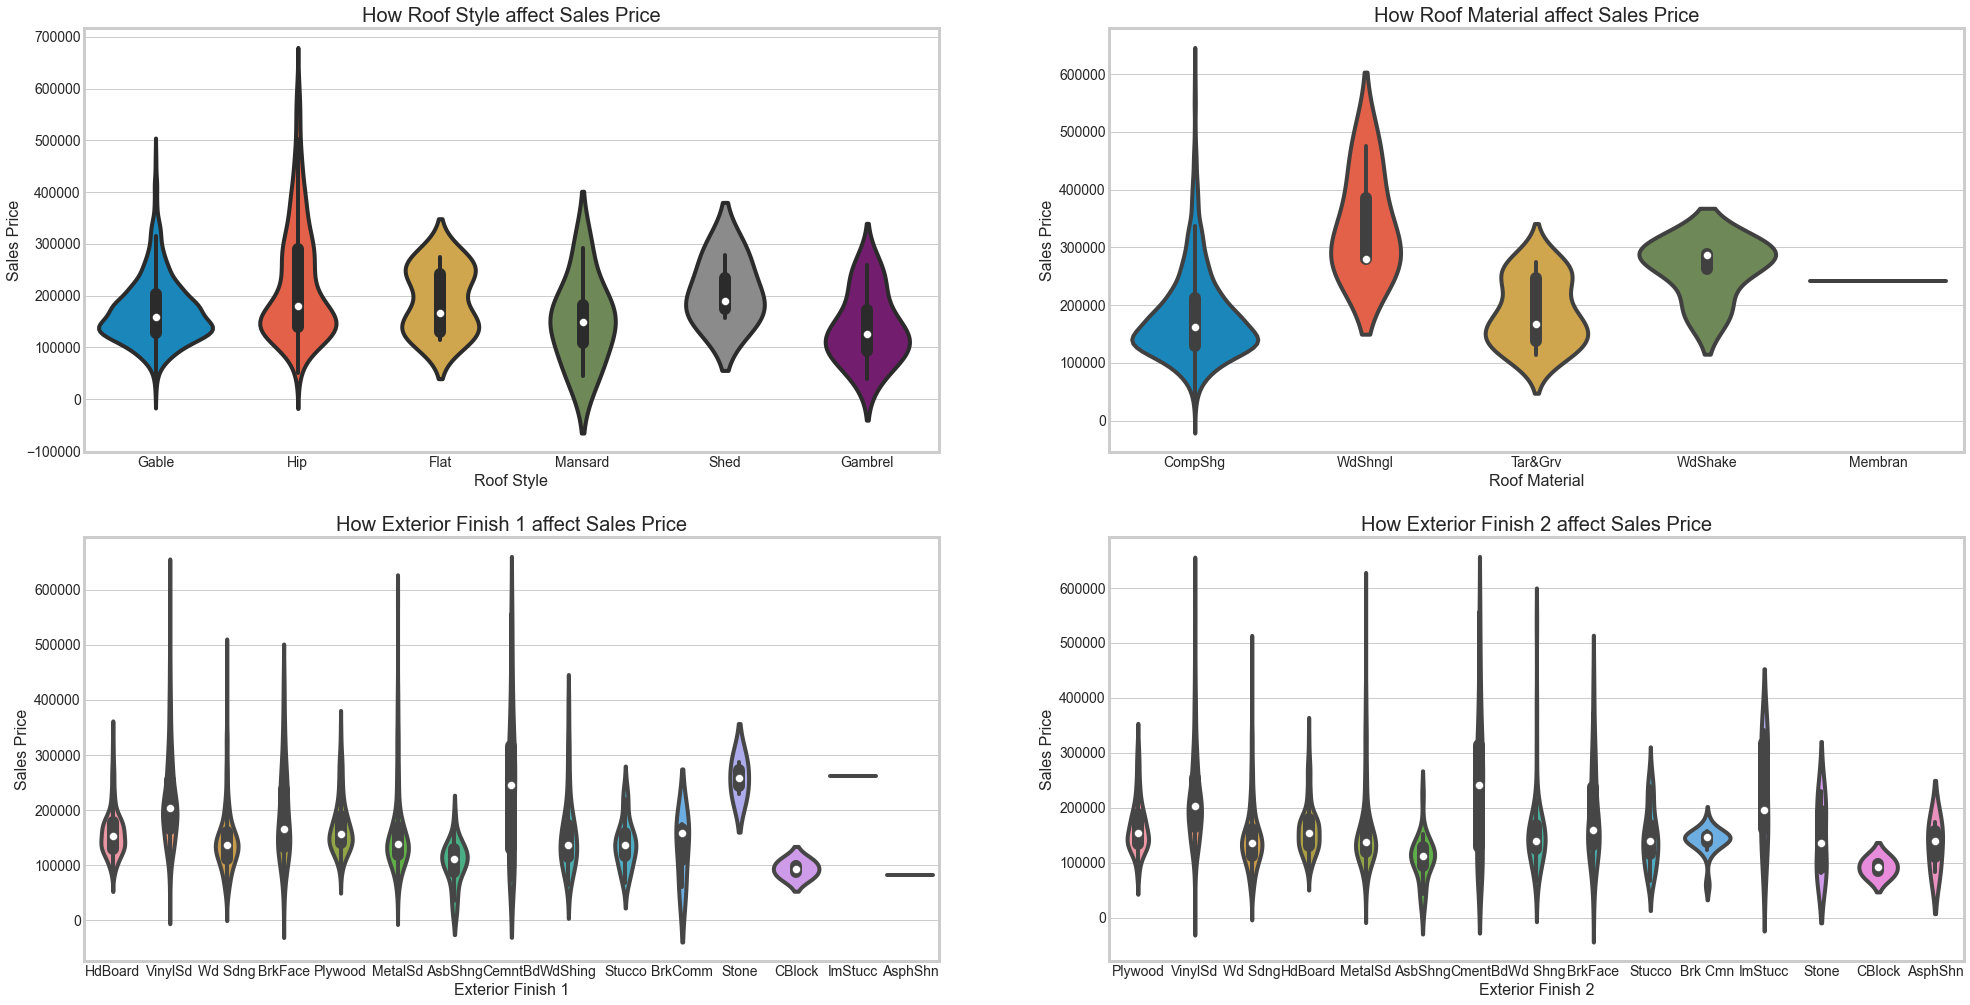

In [1253]:
fig, axs = plt.subplots(figsize = (30,16))
# plot sales price against roof style
ax1 = plt.subplot(221)
sns.violinplot(ax = ax1, y = 'saleprice',x = 'roof_style', data = train)
ax1.set_title("How Roof Style affect Sales Price", fontsize = 20)
ax1.set_xlabel("Roof Style", fontsize = 16)
ax1.set_ylabel("Sales Price", fontsize = 16)

# plot sales price against roof material
ax2 = plt.subplot(222)
sns.violinplot(ax = ax2, y = 'saleprice',x = 'roof_matl', data = train)
ax2.set_title("How Roof Material affect Sales Price", fontsize = 20)
ax2.set_xlabel("Roof Material", fontsize = 16)
ax2.set_ylabel("Sales Price", fontsize = 16)

# plot sales price against exterior 1
ax3 = plt.subplot(223)
sns.violinplot(ax = ax3, y = 'saleprice',x = 'exterior_1st', data = train)
ax3.set_title("How Exterior Finish 1 affect Sales Price", fontsize = 20)
ax3.set_xlabel("Exterior Finish 1", fontsize = 16)
ax3.set_ylabel("Sales Price", fontsize = 16);

# plot sales price against exterior 2
ax4 = plt.subplot(224)
sns.violinplot(ax = ax4, y = 'saleprice',x = 'exterior_2nd', data = train)
ax4.set_title("How Exterior Finish 2 affect Sales Price", fontsize = 20)
ax4.set_xlabel("Exterior Finish 2", fontsize = 16)
ax4.set_ylabel("Sales Price", fontsize = 16);

Generally median prices for roof styles do not differ much across the different styles. For roof material, the median sales price differ quite a lot between categories. For first exeterior finish, stone fetched the highest median sales price. But for the second exterior finished, range for median price is relatively similar across the different types of exterior finish. 


I will drop both exterior 1 and 2 and roof style, but keep the roof material. 

In [1254]:
#remove columns
train.drop(['roof_style','exterior_1st','exterior_2nd'], axis = 1, inplace = True)
test.drop(['roof_style','exterior_1st','exterior_2nd'], axis = 1, inplace = True)
#check
print(train.columns)
print(test.columns)

Index(['ms_zoning', 'utilities', 'neighborhood', 'condition_2', 'overall_qual',
       'roof_matl', 'mas_vnr_area', 'exter_qual', 'foundation', 'bsmt_qual',
       'heating', 'heating_qc', 'central_air', 'electrical', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'garage_type', 'garage_finish', 'garage_cars', 'garage_area',
       'paved_drive', 'sale_type', 'saleprice', 'age', 'total_hse_area',
       'total_bathrms'],
      dtype='object')
Index(['ms_zoning', 'utilities', 'neighborhood', 'condition_2', 'overall_qual',
       'roof_matl', 'mas_vnr_area', 'exter_qual', 'foundation', 'bsmt_qual',
       'heating', 'heating_qc', 'central_air', 'electrical', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'garage_type', 'garage_finish', 'garage_cars', 'garage_area',
       'paved_drive', 'sale_type', 'age', 'total_hse_area', 'total_bathrms'],
      dtype='object')


## Foundation
Refers to the type of foundation of the house.

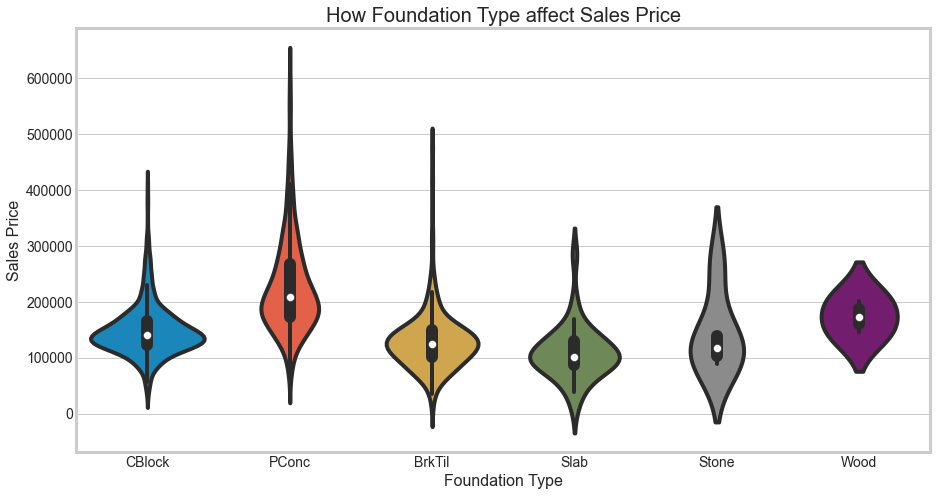

In [1255]:
fig, axs = plt.subplots(figsize = (30,16))
# plot sales price against foundation
ax1 = plt.subplot(221)
sns.violinplot(ax = ax1, y = 'saleprice',x = 'foundation', data = train)
ax1.set_title("How Foundation Type affect Sales Price", fontsize = 20)
ax1.set_xlabel("Foundation Type", fontsize = 16)
ax1.set_ylabel("Sales Price", fontsize = 16);

There doesn't seem to be any large difference in median sales price across the different types of foundation. I will drop this column. 

In [1256]:
#remove columns
train.drop(['foundation'], axis = 1, inplace = True)
test.drop(['foundation'], axis = 1, inplace = True)
#cehck
print(train.columns)
print(test.columns)

Index(['ms_zoning', 'utilities', 'neighborhood', 'condition_2', 'overall_qual',
       'roof_matl', 'mas_vnr_area', 'exter_qual', 'bsmt_qual', 'heating',
       'heating_qc', 'central_air', 'electrical', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'garage_type', 'garage_finish', 'garage_cars', 'garage_area',
       'paved_drive', 'sale_type', 'saleprice', 'age', 'total_hse_area',
       'total_bathrms'],
      dtype='object')
Index(['ms_zoning', 'utilities', 'neighborhood', 'condition_2', 'overall_qual',
       'roof_matl', 'mas_vnr_area', 'exter_qual', 'bsmt_qual', 'heating',
       'heating_qc', 'central_air', 'electrical', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'garage_type', 'garage_finish', 'garage_cars', 'garage_area',
       'paved_drive', 'sale_type', 'age', 'total_hse_area', 'total_bathrms'],
      dtype='object')


## Bedroom and Kitchen above grade
These two can be removed as generally home buyers look to total number of rooms and bathrooms. Total number of rooms is reflected in 'totrms_abvgrd' while total number of bathrooms reflected in 'total_bathrms'.

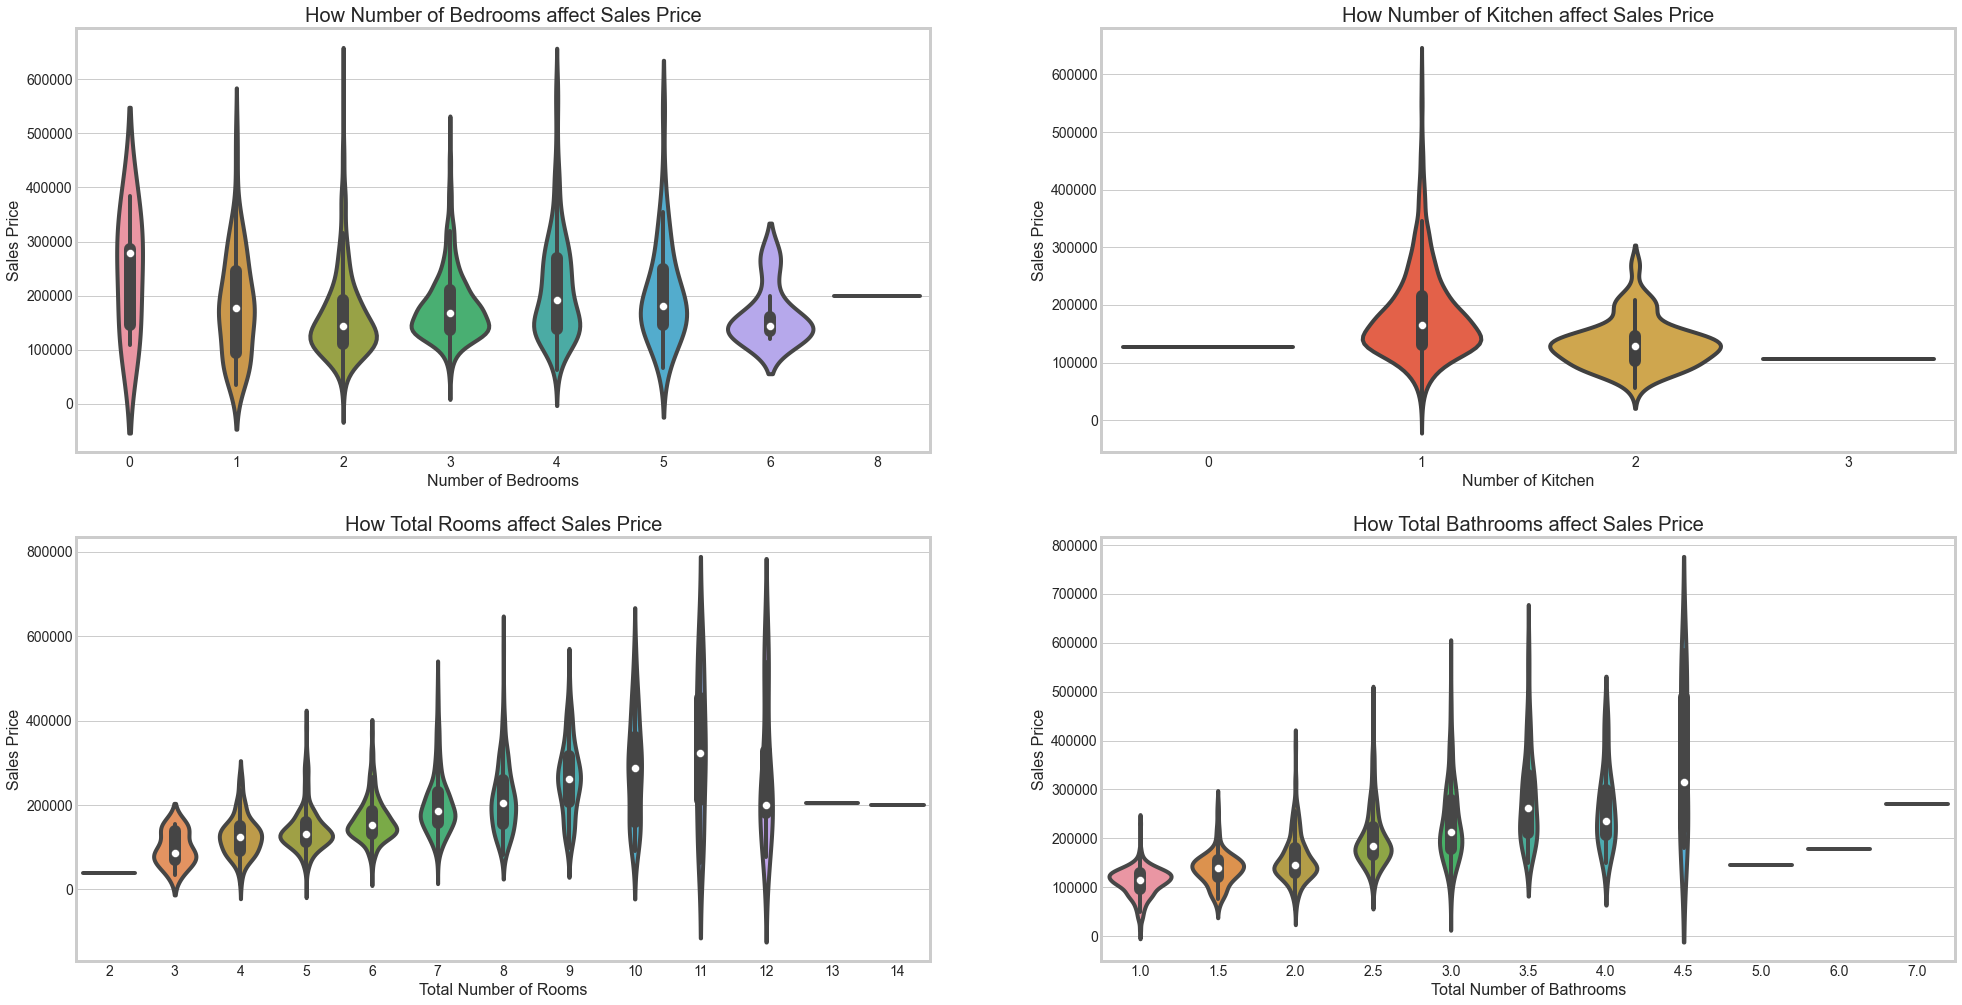

In [1257]:
fig, axs = plt.subplots(figsize = (30,16))
# plot sales price against bedroom abvgrd
ax1 = plt.subplot(221)
sns.violinplot(ax = ax1, y = 'saleprice',x = 'bedroom_abvgr', data = train)
ax1.set_title("How Number of Bedrooms affect Sales Price", fontsize = 20)
ax1.set_xlabel("Number of Bedrooms", fontsize = 16)
ax1.set_ylabel("Sales Price", fontsize = 16)

# plot sales price against kitchen abvgrd
ax2 = plt.subplot(222)
sns.violinplot(ax = ax2, y = 'saleprice',x = 'kitchen_abvgr', data = train)
ax2.set_title("How Number of Kitchen affect Sales Price", fontsize = 20)
ax2.set_xlabel("Number of Kitchen", fontsize = 16)
ax2.set_ylabel("Sales Price", fontsize = 16)

# plot sales price against etotal rooms above grade
ax3 = plt.subplot(223)
sns.violinplot(ax = ax3, y = 'saleprice',x = 'totrms_abvgrd', data = train)
ax3.set_title("How Total Rooms affect Sales Price", fontsize = 20)
ax3.set_xlabel("Total Number of Rooms", fontsize = 16)
ax3.set_ylabel("Sales Price", fontsize = 16);

# plot sales price against total bathrooms 
ax4 = plt.subplot(224)
sns.violinplot(ax = ax4, y = 'saleprice',x = 'total_bathrms', data = train)
ax4.set_title("How Total Bathrooms affect Sales Price", fontsize = 20)
ax4.set_xlabel("Total Number of Bathrooms", fontsize = 16)
ax4.set_ylabel("Sales Price", fontsize = 16);

From above plots, it is pretty clear that the number of bedrooms and kitchen do not have a strong correlation with sales price. The total number of rooms and total number of bathrooms show a stronger correlation wtih sales price. 

In [1258]:
#remove columns
train.drop(['bedroom_abvgr', 'kitchen_abvgr'], axis = 1, inplace = True)
test.drop(['bedroom_abvgr', 'kitchen_abvgr'], axis = 1, inplace = True)
#check
print(train.columns)
print(test.columns)

Index(['ms_zoning', 'utilities', 'neighborhood', 'condition_2', 'overall_qual',
       'roof_matl', 'mas_vnr_area', 'exter_qual', 'bsmt_qual', 'heating',
       'heating_qc', 'central_air', 'electrical', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'garage_type', 'garage_finish',
       'garage_cars', 'garage_area', 'paved_drive', 'sale_type', 'saleprice',
       'age', 'total_hse_area', 'total_bathrms'],
      dtype='object')
Index(['ms_zoning', 'utilities', 'neighborhood', 'condition_2', 'overall_qual',
       'roof_matl', 'mas_vnr_area', 'exter_qual', 'bsmt_qual', 'heating',
       'heating_qc', 'central_air', 'electrical', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'garage_type', 'garage_finish',
       'garage_cars', 'garage_area', 'paved_drive', 'sale_type', 'age',
       'total_hse_area', 'total_bathrms'],
      dtype='object')


## Utilities, Heating and QC, Central Air, Electrical
Look at how these factors affect sales price. 

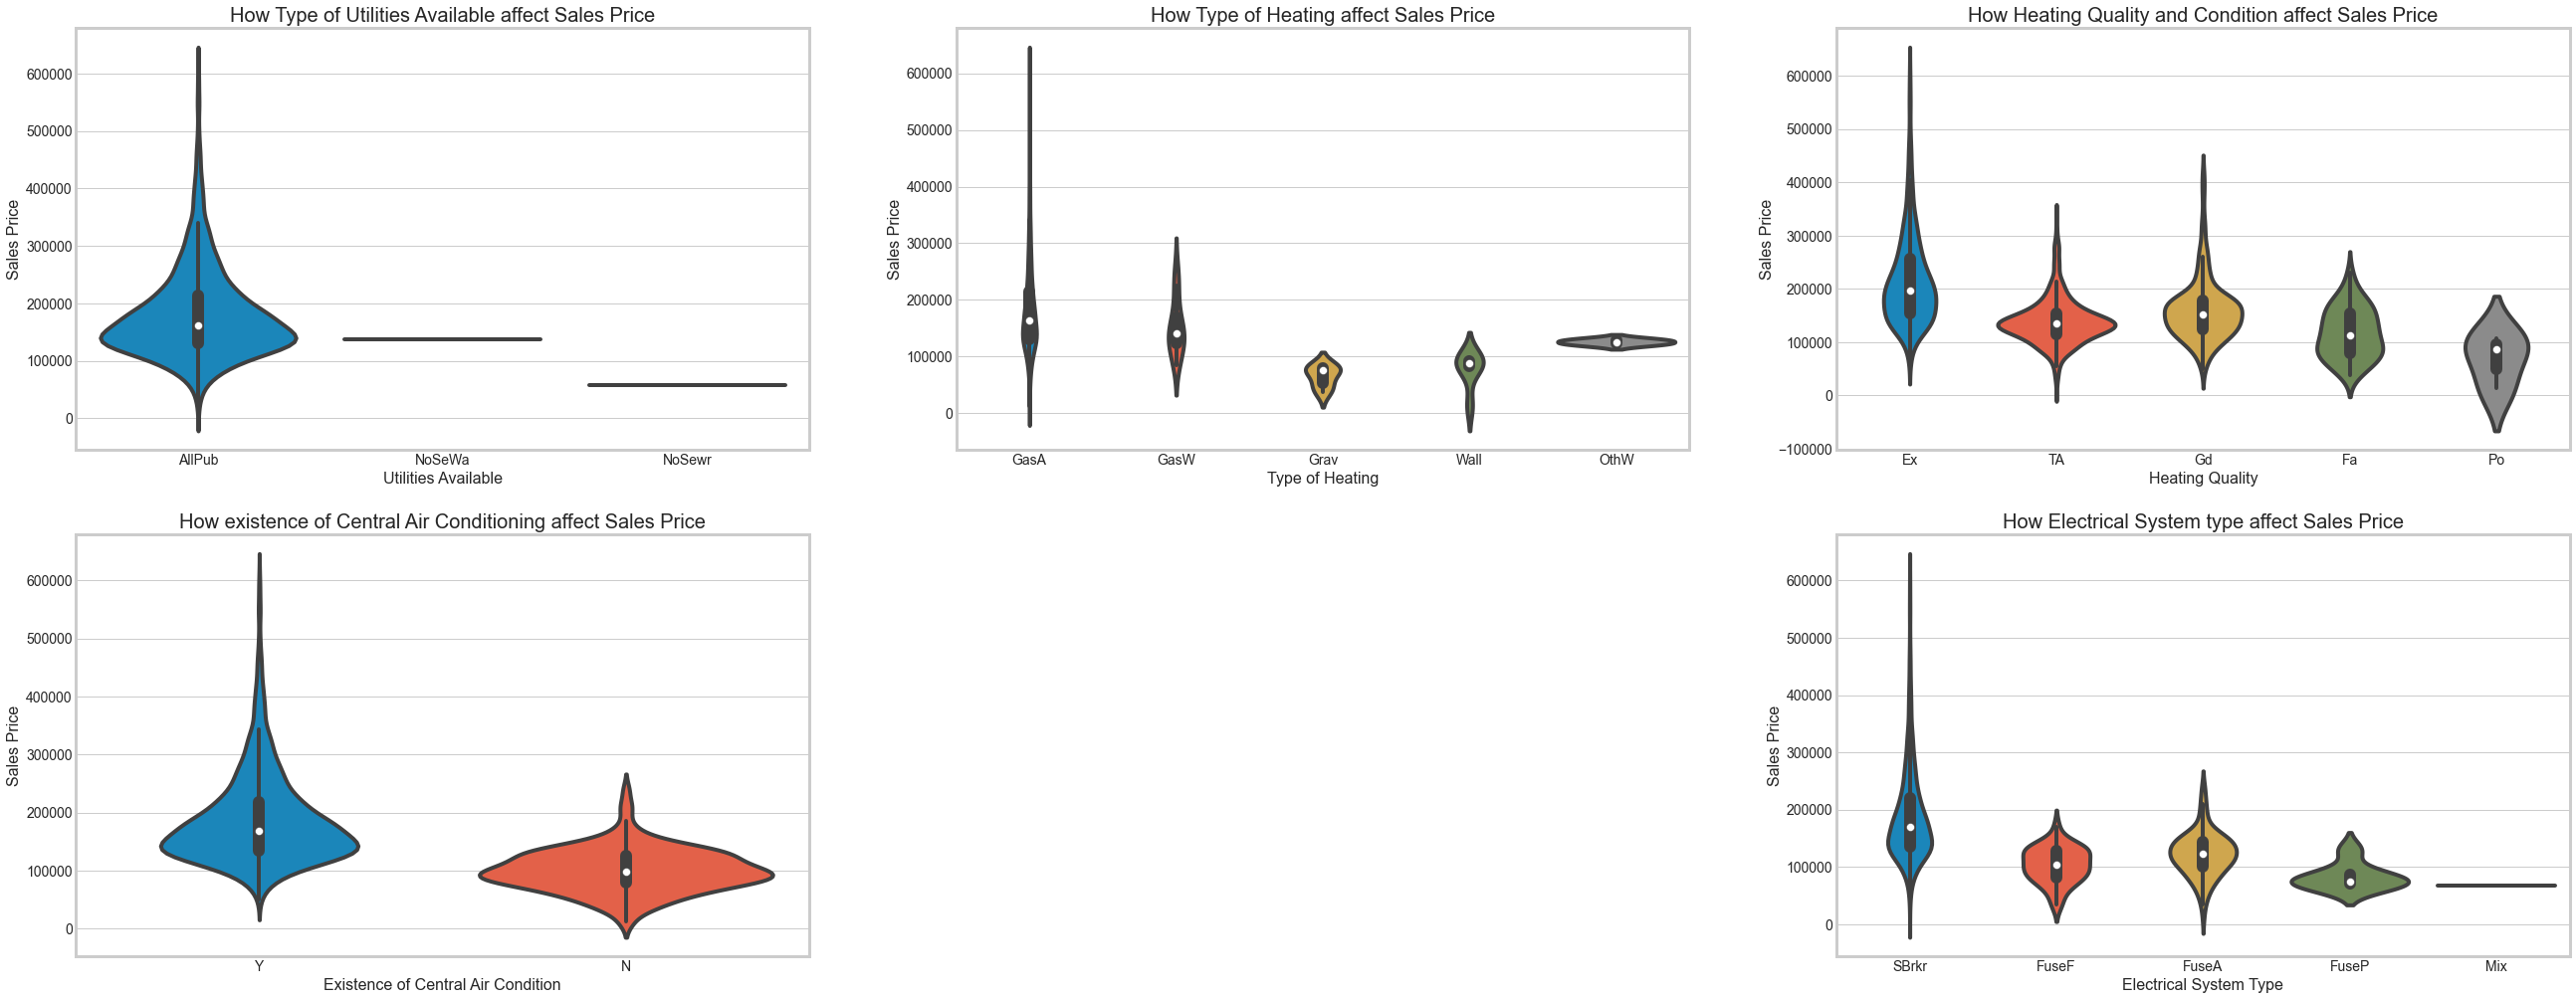

In [1259]:
fig, axs = plt.subplots(figsize = (40,16))
# plot sales price against utilities
ax1 = plt.subplot(231)
sns.violinplot(ax = ax1, y = 'saleprice',x = 'utilities', data = train)
ax1.set_title("How Type of Utilities Available affect Sales Price", fontsize = 20)
ax1.set_xlabel("Utilities Available", fontsize = 16)
ax1.set_ylabel("Sales Price", fontsize = 16)

# plot sales price against heating
ax2 = plt.subplot(232)
sns.violinplot(ax = ax2, y = 'saleprice',x = 'heating', data = train)
ax2.set_title("How Type of Heating affect Sales Price", fontsize = 20)
ax2.set_xlabel("Type of Heating", fontsize = 16)
ax2.set_ylabel("Sales Price", fontsize = 16)

# plot sales price against heating qc
ax3 = plt.subplot(233)
sns.violinplot(ax = ax3, y = 'saleprice',x = 'heating_qc', data = train)
ax3.set_title("How Heating Quality and Condition affect Sales Price", fontsize = 20)
ax3.set_xlabel("Heating Quality", fontsize = 16)
ax3.set_ylabel("Sales Price", fontsize = 16);

# plot sales price against central air
ax4 = plt.subplot(234)
sns.violinplot(ax = ax4, y = 'saleprice',x = 'central_air', data = train)
ax4.set_title("How existence of Central Air Conditioning affect Sales Price", fontsize = 20)
ax4.set_xlabel("Existence of Central Air Condition", fontsize = 16)
ax4.set_ylabel("Sales Price", fontsize = 16);

# plot sales price against electrical
ax5 = plt.subplot(236)
sns.violinplot(ax = ax5, y = 'saleprice',x = 'electrical', data = train)
ax5.set_title("How Electrical System type affect Sales Price", fontsize = 20)
ax5.set_xlabel("Electrical System Type", fontsize = 16)
ax5.set_ylabel("Sales Price", fontsize = 16);

In [1260]:
train.utilities.value_counts()

AllPub    2047
NoSewr       1
NoSeWa       1
Name: utilities, dtype: int64

Median sales prices generally increase with increase in heating quality. Existence of air conditioning also can fetch higher sales price. Electrical system type also generally shows a trend where standard circuit breakers and romex can fetch higher sales prices than other electrical system type. Heating Type does not show any correlation.

It appears that most houses have public utilities, we can drop this column.

In [1261]:
#remove columns
train.drop(['utilities', 'heating'], axis = 1, inplace = True)
test.drop(['utilities', 'heating'], axis = 1, inplace = True)
#check
print(train.columns)
print(test.columns)

Index(['ms_zoning', 'neighborhood', 'condition_2', 'overall_qual', 'roof_matl',
       'mas_vnr_area', 'exter_qual', 'bsmt_qual', 'heating_qc', 'central_air',
       'electrical', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'garage_type', 'garage_finish', 'garage_cars', 'garage_area',
       'paved_drive', 'sale_type', 'saleprice', 'age', 'total_hse_area',
       'total_bathrms'],
      dtype='object')
Index(['ms_zoning', 'neighborhood', 'condition_2', 'overall_qual', 'roof_matl',
       'mas_vnr_area', 'exter_qual', 'bsmt_qual', 'heating_qc', 'central_air',
       'electrical', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'garage_type', 'garage_finish', 'garage_cars', 'garage_area',
       'paved_drive', 'sale_type', 'age', 'total_hse_area', 'total_bathrms'],
      dtype='object')


In [1262]:
print(train.shape)
print(test.shape)

(2049, 24)
(879, 23)


Now we deal with electrical null value in the train dataset.

In [1263]:
#find the mode
test['electrical'].mode()

0    SBrkr
dtype: object

In [1264]:
#impute na values with mode
test.fillna({'electrical':'SBrkr'}, inplace = True)
#check
test.isnull().sum()

ms_zoning         0
neighborhood      0
condition_2       0
overall_qual      0
roof_matl         0
mas_vnr_area      0
exter_qual        0
bsmt_qual         0
heating_qc        0
central_air       0
electrical        0
kitchen_qual      0
totrms_abvgrd     0
functional        0
garage_type       0
garage_finish     0
garage_cars       0
garage_area       0
paved_drive       0
sale_type         0
age               0
total_hse_area    0
total_bathrms     0
dtype: int64

In [1265]:
#cehck that there are no longer any missing values
test[test.columns[test.isna().any()].tolist()].isna().sum()

Series([], dtype: float64)

In [1266]:
#check both train and test datasets that are clean
print(train.shape)
print(test.shape)

(2049, 24)
(879, 23)


## Preview Clean Train Dataset

From the clean dataset, I look at the shape, summary statistics and correlation of numeric columns with the target variable.

In [1267]:
#view summary stats
train.describe()

overall_qual  mas_vnr_area   exter_qual    bsmt_qual  totrms_abvgrd  \
count   2049.000000   2049.000000  2049.000000  2049.000000    2049.000000   
mean       6.108346     97.427038     3.404588     3.569058       6.428990   
std        1.421780    171.826526     0.586134     0.696138       1.544572   
min        1.000000      0.000000     2.000000     1.000000       2.000000   
25%        5.000000      0.000000     3.000000     3.000000       5.000000   
50%        6.000000      0.000000     3.000000     4.000000       6.000000   
75%        7.000000    157.000000     4.000000     4.000000       7.000000   
max       10.000000   1600.000000     5.000000     5.000000      14.000000   

       garage_cars  garage_area      saleprice          age  total_hse_area  \
count  2049.000000  2049.000000    2049.000000  2049.000000     2049.000000   
mean      1.775012   472.647633  181479.018058    36.102489     2548.589068   
std       0.765236   214.703467   79295.913255    30.204176      766.978588   
min       0.000000     0.000000   12789.000000     0.000000      334.000000   
25%       1.000000   319.000000  129800.000000     7.000000     2010.000000   
50%       2.000000   480.000000  162500.000000    34.000000     2457.000000   
75%       2.000000   576.000000  214000.000000    54.000000     2996.000000   
max       5.000000  1356.000000  611657.000000   136.000000     6428.000000   

       total_bathrms  
count    2049.000000  
mean        2.219619  
std         0.805157  
min         1.000000  
25%         2.000000  
50%         2.000000  
75%         3.000000  
max         7.000000

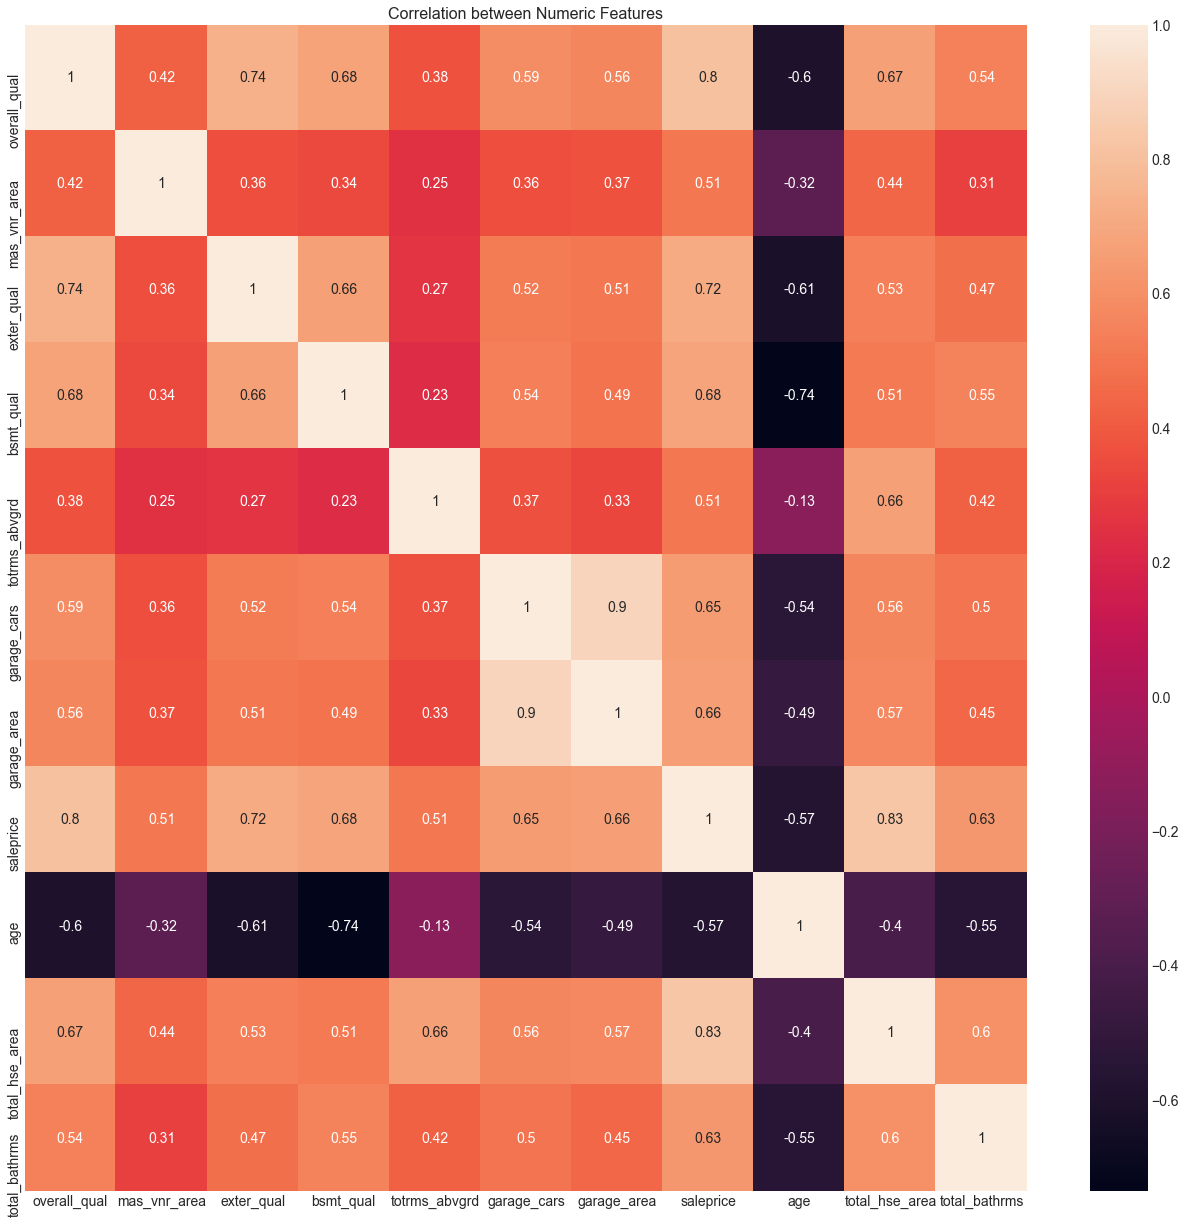

In [1268]:
# check for multicollinearity
plt.figure(figsize = (20,20))
sns.heatmap(train.corr(), annot = True)
plt.title("Correlation between Numeric Features", fontsize = 16);

From here, we can see that total house area (0.83) has a strong correlation with sales price. 
On multicollinearity, there is a strong correlation between garage_area and garage_car. I will drop garage_cars as it has lower correlation with sales price compared to garage_area. 

In [1269]:
#remove columns
train.drop(['garage_cars'], axis = 1, inplace = True)
test.drop(['garage_cars'], axis = 1, inplace = True)
#check final columns
print(train.columns)
print(test.columns)

Index(['ms_zoning', 'neighborhood', 'condition_2', 'overall_qual', 'roof_matl',
       'mas_vnr_area', 'exter_qual', 'bsmt_qual', 'heating_qc', 'central_air',
       'electrical', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'garage_type', 'garage_finish', 'garage_area', 'paved_drive',
       'sale_type', 'saleprice', 'age', 'total_hse_area', 'total_bathrms'],
      dtype='object')
Index(['ms_zoning', 'neighborhood', 'condition_2', 'overall_qual', 'roof_matl',
       'mas_vnr_area', 'exter_qual', 'bsmt_qual', 'heating_qc', 'central_air',
       'electrical', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'garage_type', 'garage_finish', 'garage_area', 'paved_drive',
       'sale_type', 'age', 'total_hse_area', 'total_bathrms'],
      dtype='object')


In [1270]:
#check final shape of datasets
print(train.shape)
print(test.shape)

(2049, 23)
(879, 22)


## Save Clean Dataset

In [1271]:
# save cleaned csv file out
train.to_csv("../data/train_clean.csv", index = False)
test.to_csv("../data/test_clean.csv", index = False)

In [1272]:
#preview train
train_clean = pd.read_csv("../data/train_clean.csv")
train_clean.head()

ms_zoning neighborhood condition_2  overall_qual roof_matl  mas_vnr_area  \
0        RL       Sawyer        Norm             6   CompShg         289.0   
1        RL      SawyerW        Norm             7   CompShg         132.0   
2        RL        NAmes        Norm             5   CompShg           0.0   
3        RL       Timber        Norm             5   CompShg           0.0   
4        RL      SawyerW        Norm             6   CompShg           0.0   

   exter_qual  bsmt_qual heating_qc central_air  ... functional garage_type  \
0           4          3         Ex           Y  ...        Typ      Attchd   
1           4          4         Ex           Y  ...        Typ      Attchd   
2           3          3         TA           Y  ...        Typ      Detchd   
3           3          4         Gd           Y  ...        Typ     BuiltIn   
4           3          2         TA           Y  ...        Typ      Detchd   

   garage_finish garage_area paved_drive sale_type  saleprice  age  \
0            RFn       475.0           Y       WD      130500   34   
1            RFn       559.0           Y       WD      220000   13   
2            Unf       246.0           Y       WD      109000   57   
3            Fin       400.0           Y       WD      174000    4   
4            Unf       484.0           N       WD      138500  110   

  total_hse_area  total_bathrms  
0         2204.0            2.5  
1         3035.0            3.5  
2         2114.0            2.0  
3         1828.0            2.5  
4         2121.0            2.0  

[5 rows x 23 columns]

In [1273]:
#preview test
test_clean = pd.read_csv("../data/test_clean.csv")
test_clean.head()

ms_zoning neighborhood condition_2  overall_qual roof_matl  mas_vnr_area  \
0        RM      OldTown        Norm             6   CompShg           0.0   
1        RL       Sawyer        Norm             5   CompShg           0.0   
2        RL      Gilbert        Norm             7   CompShg           0.0   
3        RM      OldTown        Norm             5   CompShg           0.0   
4        RL        NAmes        Norm             6   CompShg         247.0   

   exter_qual  bsmt_qual heating_qc central_air  ... totrms_abvgrd functional  \
0           3          2         Gd           N  ...             9        Typ   
1           3          4         TA           Y  ...            10        Typ   
2           4          4         Ex           Y  ...             7        Typ   
3           4          3         TA           Y  ...             5        Typ   
4           3          4         Gd           Y  ...             6        Typ   

   garage_type garage_finish garage_area paved_drive  sale_type age  \
0       Detchd           Unf       440.0           Y        WD   96   
1       Attchd           Fin       580.0           Y        WD   29   
2       Attchd           RFn       426.0           Y        New   0   
3       Detchd           Unf       480.0           N        WD   84   
4       Attchd           RFn       514.0           Y        WD   46   

  total_hse_area  total_bathrms  
0         2948.0            2.0  
1         3934.0            2.0  
2         2150.0            3.5  
3         1936.0            1.0  
4         2788.0            2.5  

[5 rows x 22 columns]

## References

Data Documentation - Ames Housing Dataset (De Cock, 2010).
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

"Dealing with Missing Data"(Berdikulov, 2019) 
https://medium.com/@danberdov/dealing-with-missing-data-8b71cd819501

"EM Imputation and Missing Data" (Grace-Martin, 2014) 
https://www.theanalysisfactor.com/em-imputation-and-missing-data-is-mean-imputation-really-so-terrible/

"6 Different Ways to Compensate for Missing Values in a Dataset" (Badr, 2019)
https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

"Data Mining - Mean/Median/Mode" (Williams, 2010)
http://datamining.togaware.com/survivor/Mean_Median_Mode.html

"Brick vs Cement Block in Masonry" (Mehta, 2019)
https://www.bricknbolt.com/blogs-and-articles/brick-vs-cement-block-in-masonry

"Is Normal Distribution Necessary in Regression? How to track and fix it?" (Wu, 2020)
https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd